# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [44]:
pip install numpy pandas seaborn matplotlib scikit-learn plotnine

Note: you may need to restart the kernel to use updated packages.


Running this project require the following imports 

In [45]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [46]:
#function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [47]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



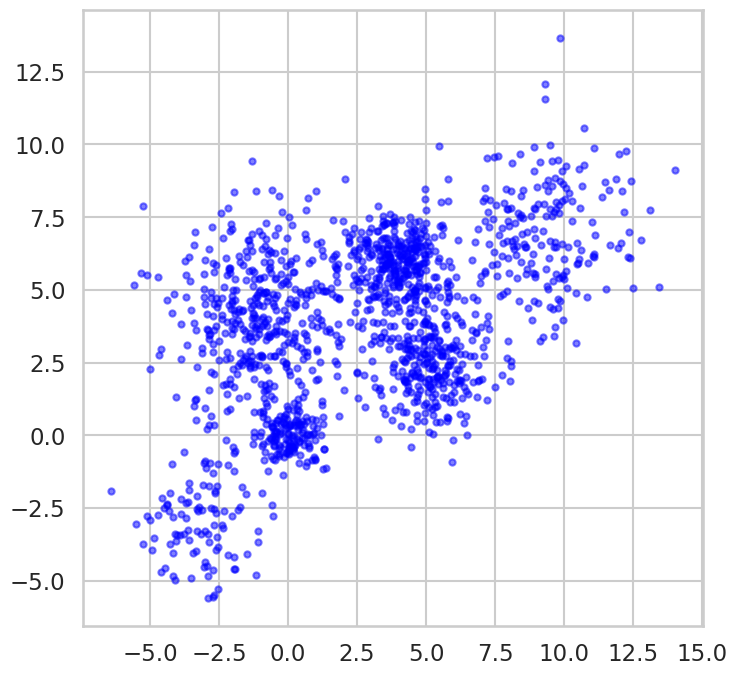

In [48]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
- [x] Use Kmeans with different values of K to cluster the above data 
- [x] Display the outcome of each value of K 
- [x] Plot distortion function versus K and choose the approriate value of k 
- [x] Plot the silhouette_score versus K and use it to choose the best K 
- [ ] Store the silhouette_score for the best K for later comparison with other clustering techniques. 

Running Kmeans with 3 clusters


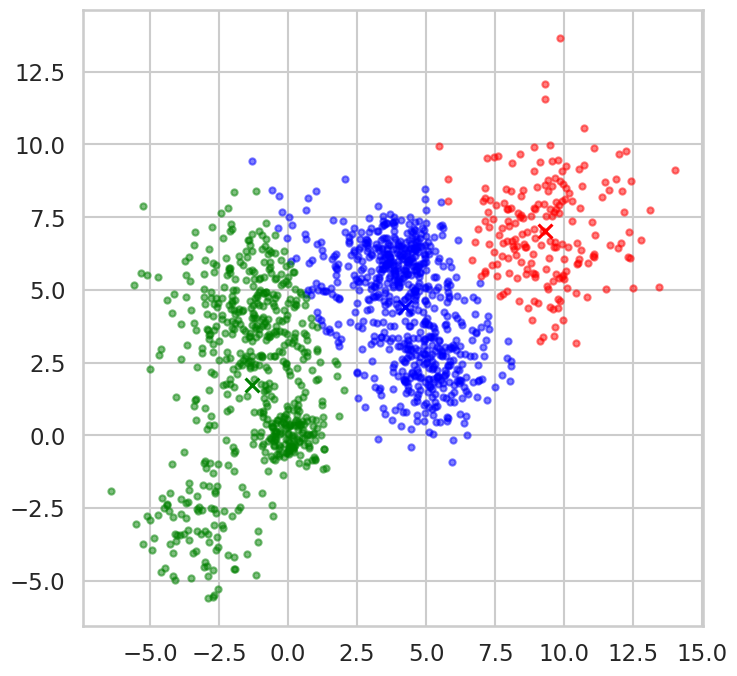

Running Kmeans with 5 clusters


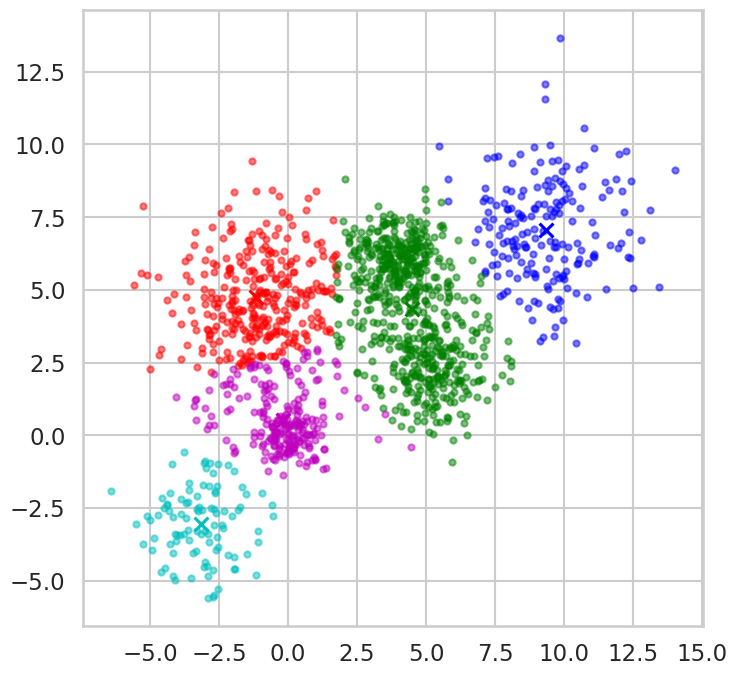

Running Kmeans with 7 clusters


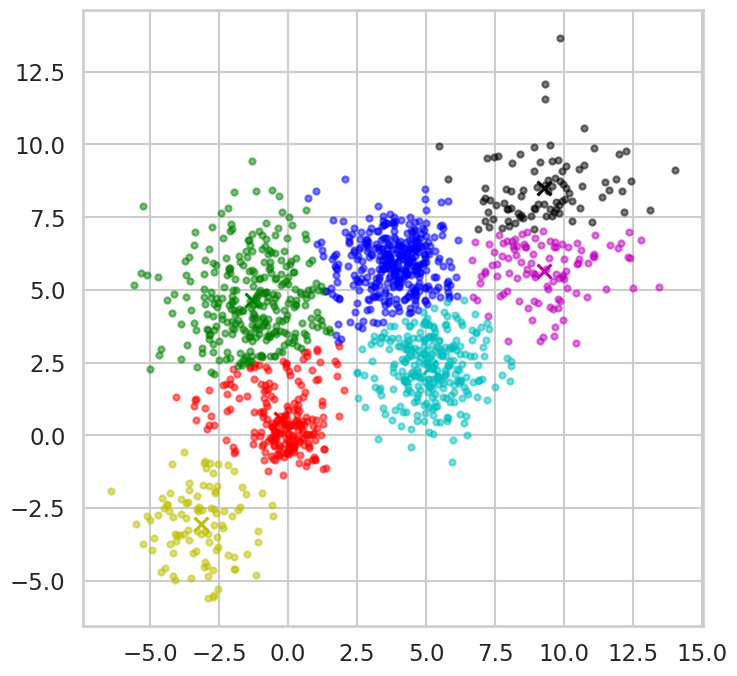

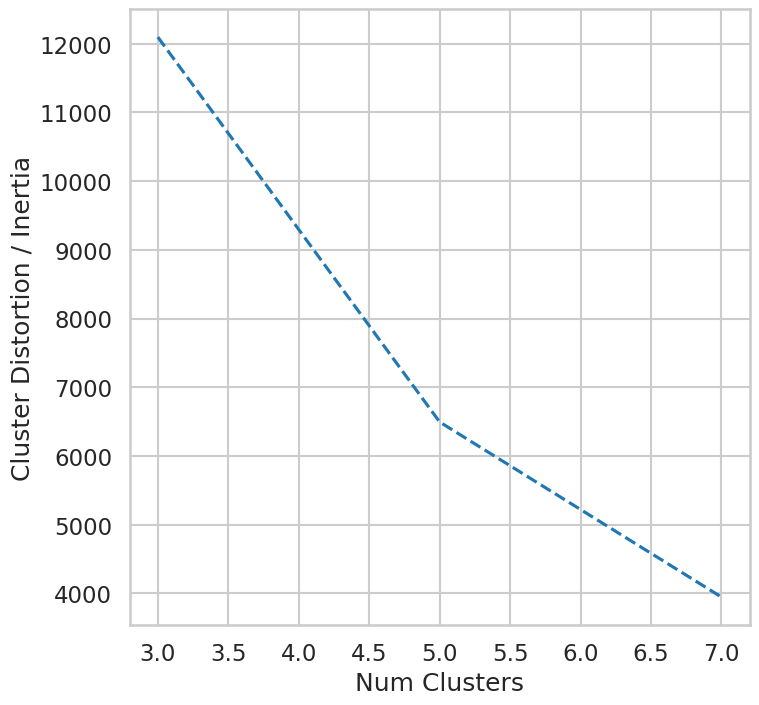

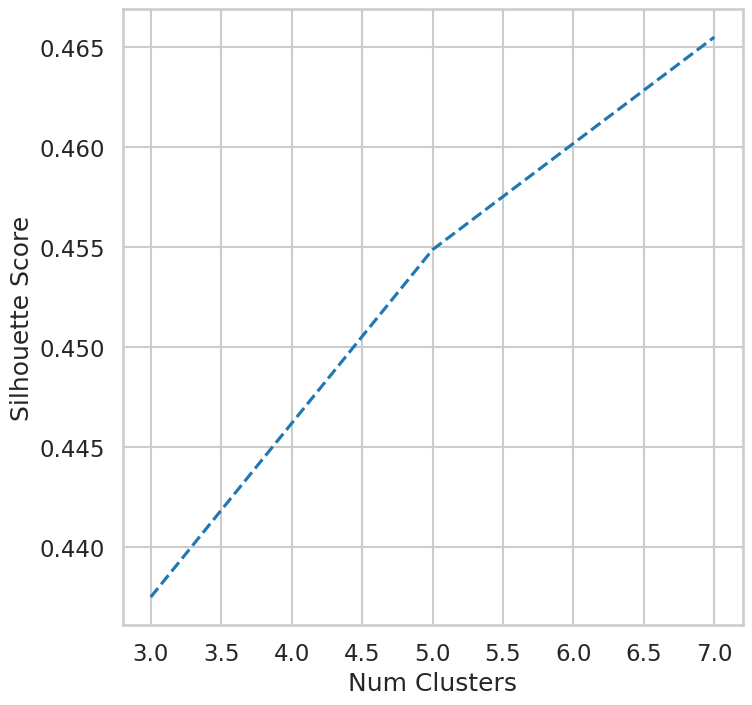

Best K: 7, score: 0.4654948014718855


In [49]:
def get_best_k_from_kmeans(data_points):
    list_num_clusters = [3, 5, 7]
    k_inertia = []
    k_silhouette = []
    for num_clusters in list_num_clusters:
        print(f'Running Kmeans with {num_clusters} clusters')
        kmeans = KMeans(num_clusters).fit(data_points)
        display_cluster(data_points, kmeans, num_clusters)
        k_inertia.append(kmeans.inertia_)
        k_silhouette.append(silhouette_score(data_points, kmeans.predict(data_points)))
        plt.show()

    plt.plot(list_num_clusters, k_inertia, ls='dashed')
    plt.xlabel('Num Clusters')
    plt.ylabel('Cluster Distortion / Inertia')
    plt.show()

    plt.plot(list_num_clusters, k_silhouette, ls='dashed')
    plt.xlabel('Num Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    max_silhouette_score = max(k_silhouette)
    best_k = list_num_clusters[k_silhouette.index(max_silhouette_score)]
    print(f'Best K: {best_k}, score: {max_silhouette_score}')

    return (best_k, max_silhouette_score)

best_k, max_silhouette_score = get_best_k_from_kmeans(Multi_blob_Data)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

For affinity euclidean


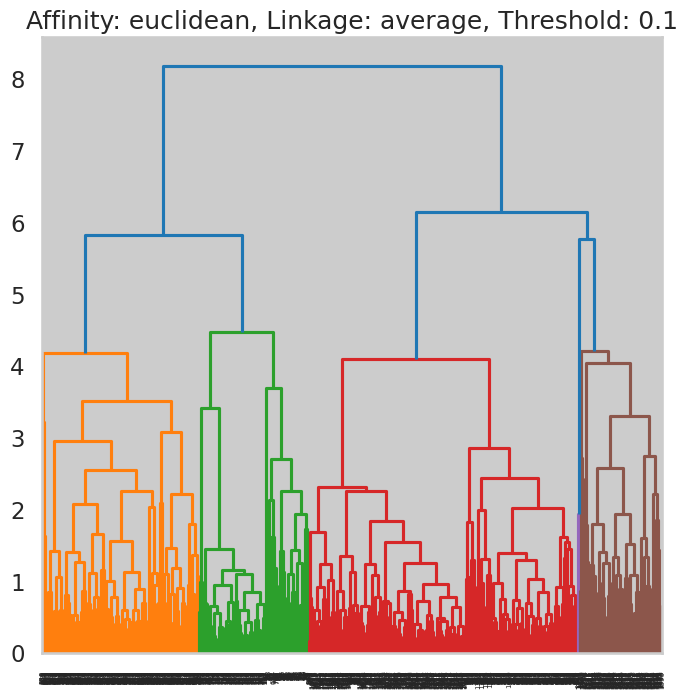

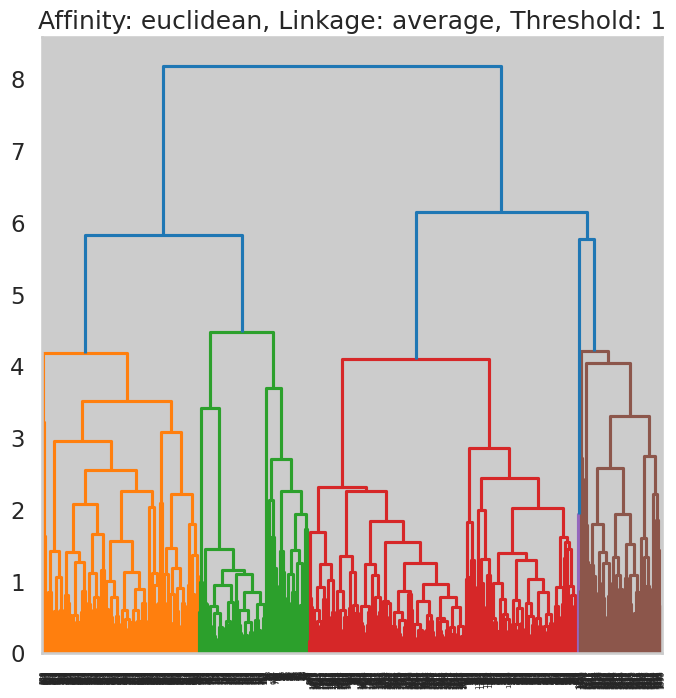

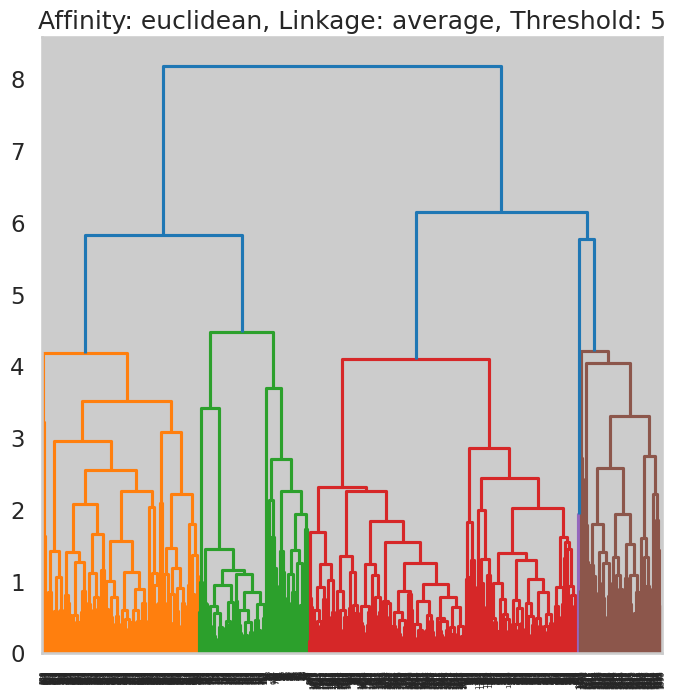

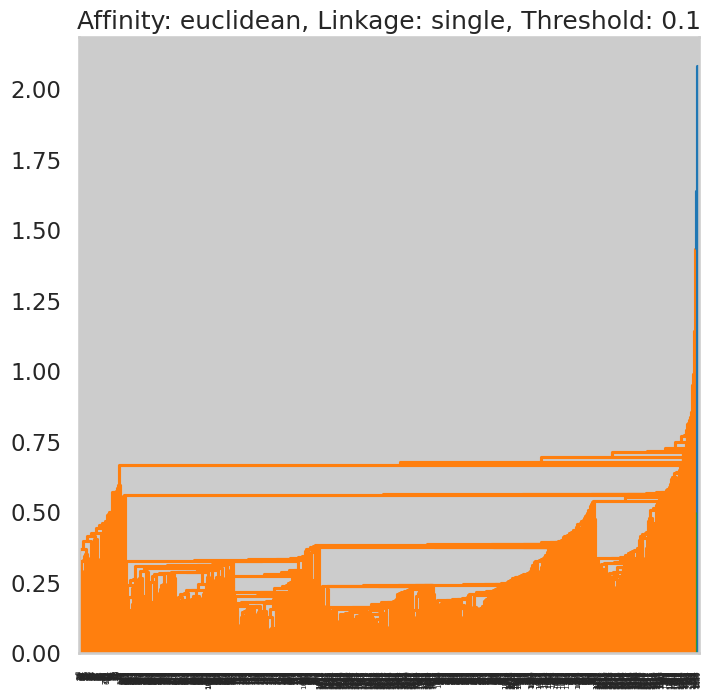

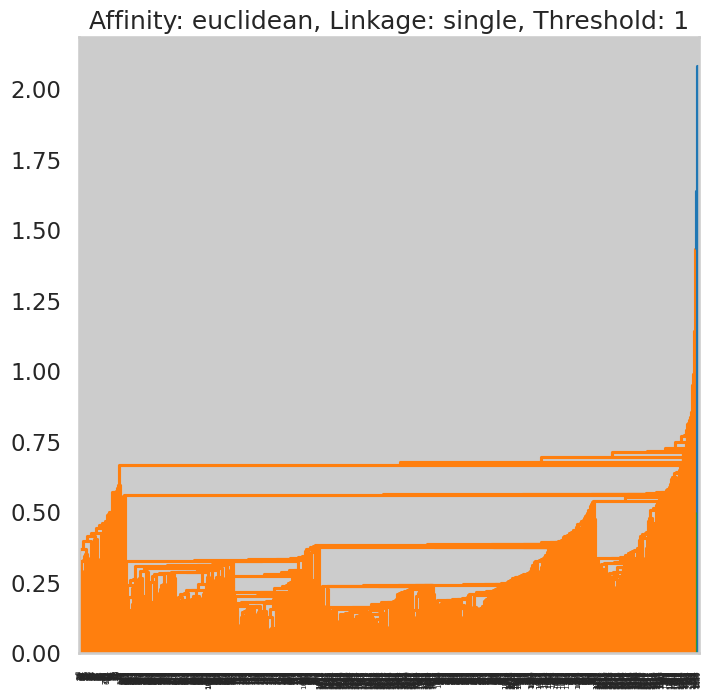

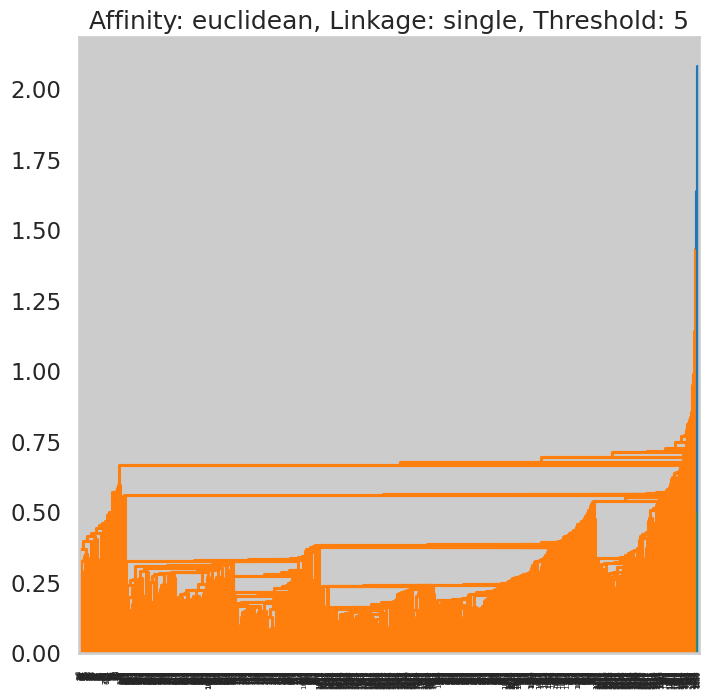

For affinity manhattan


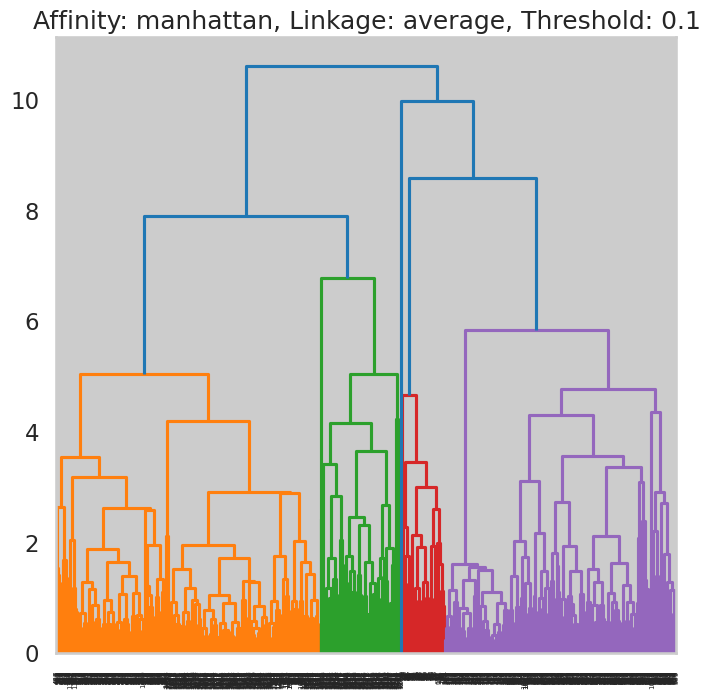

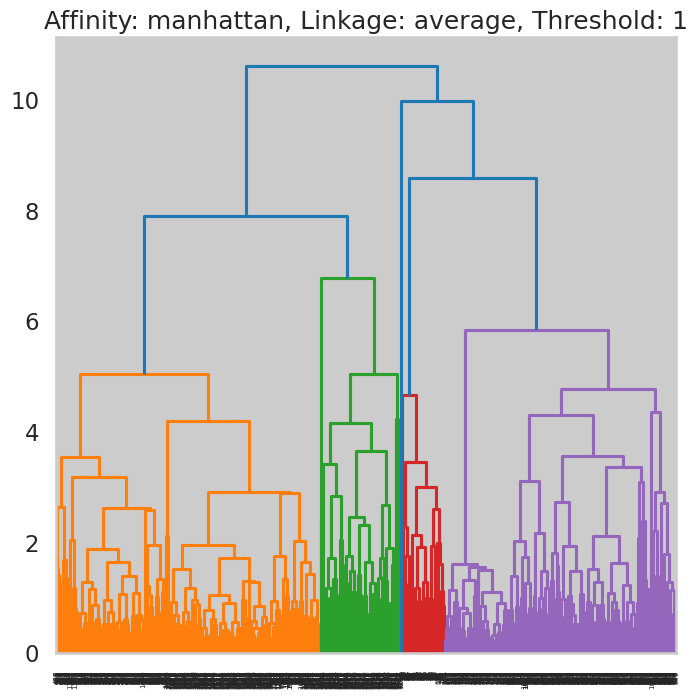

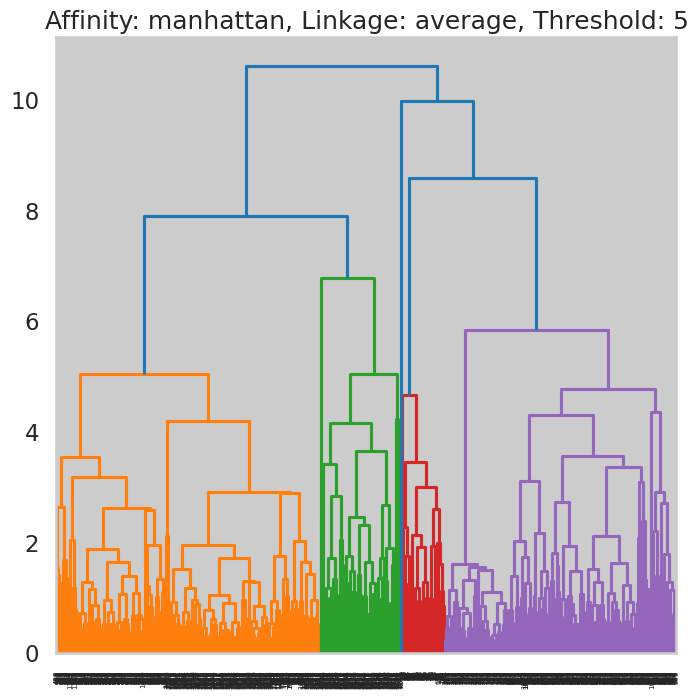

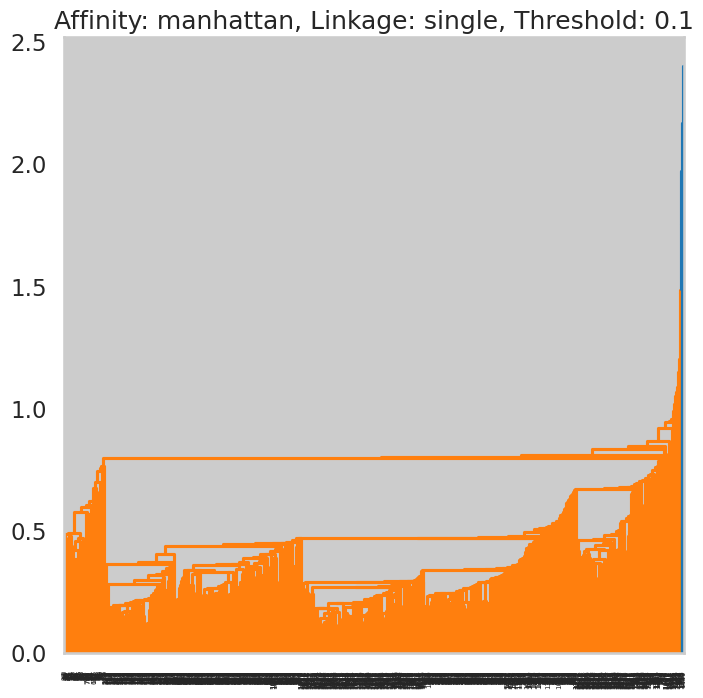

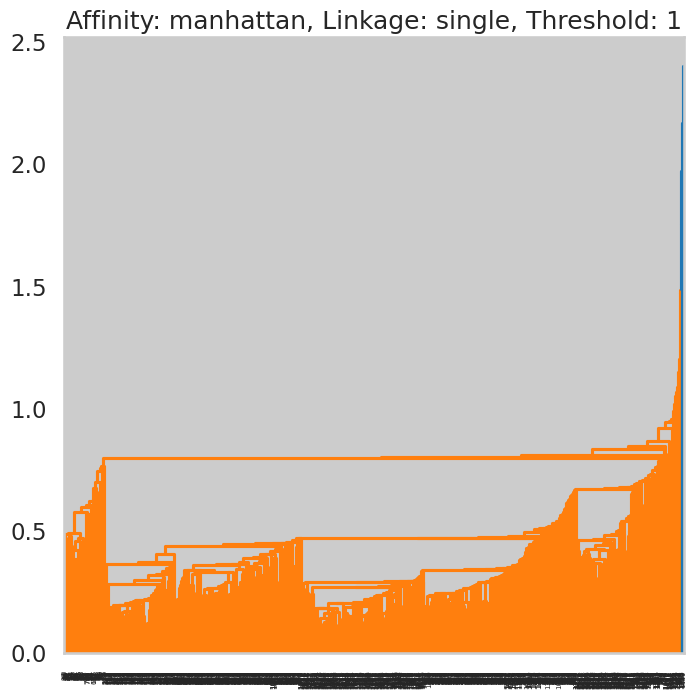

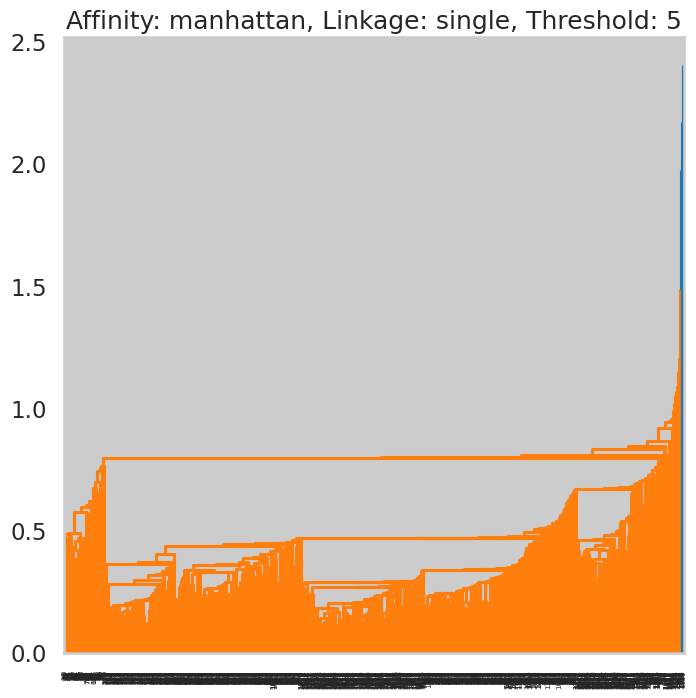

For affinity cosine


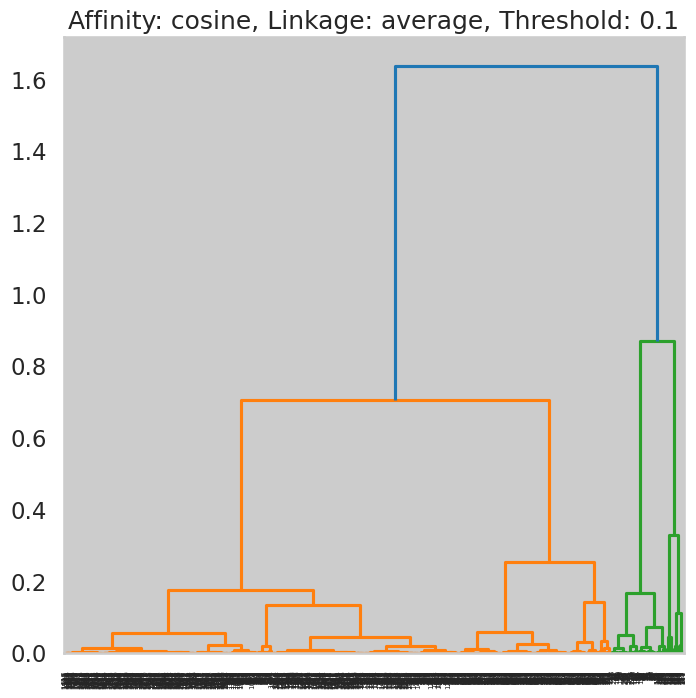

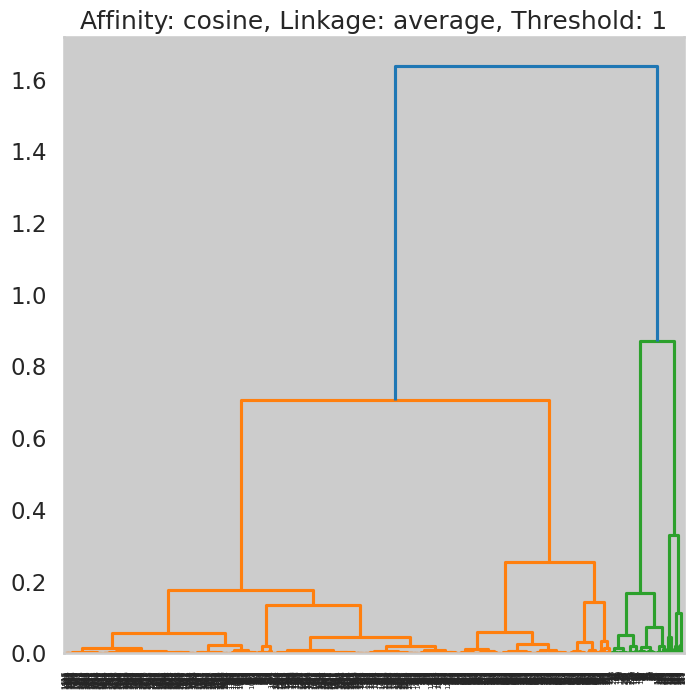

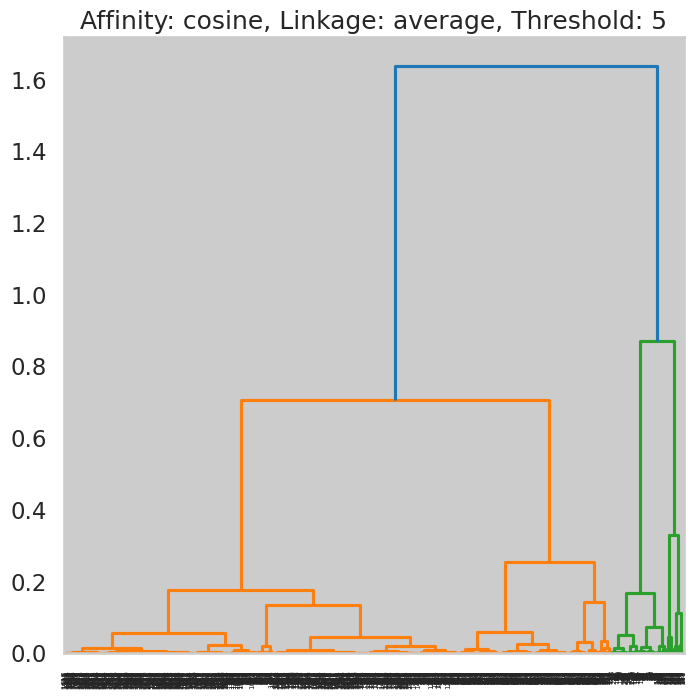

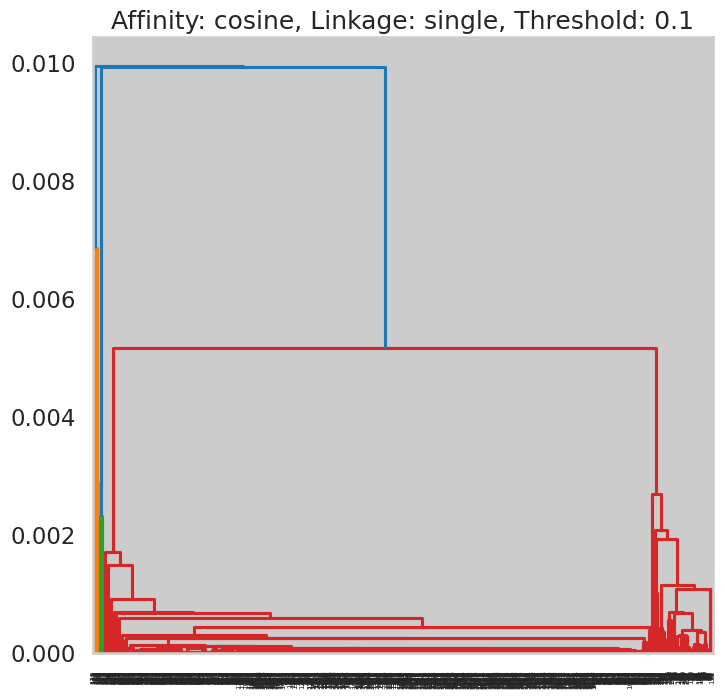

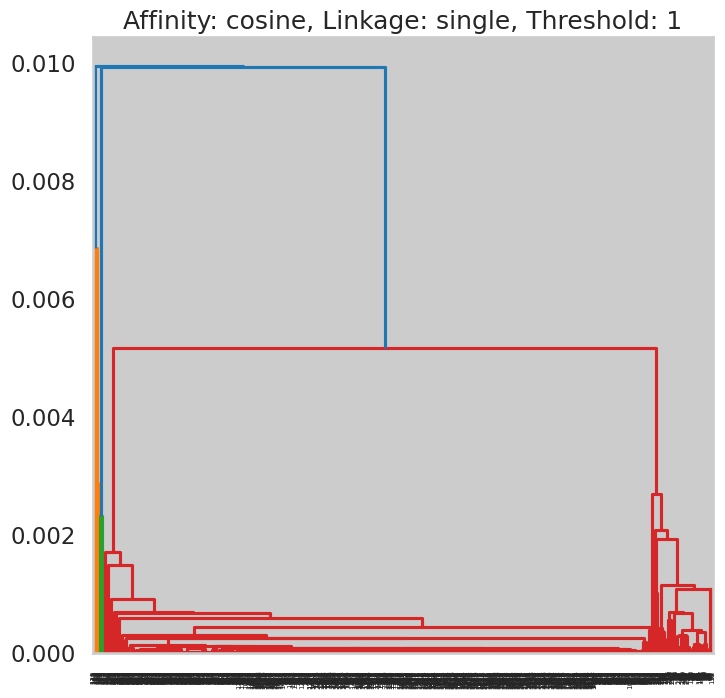

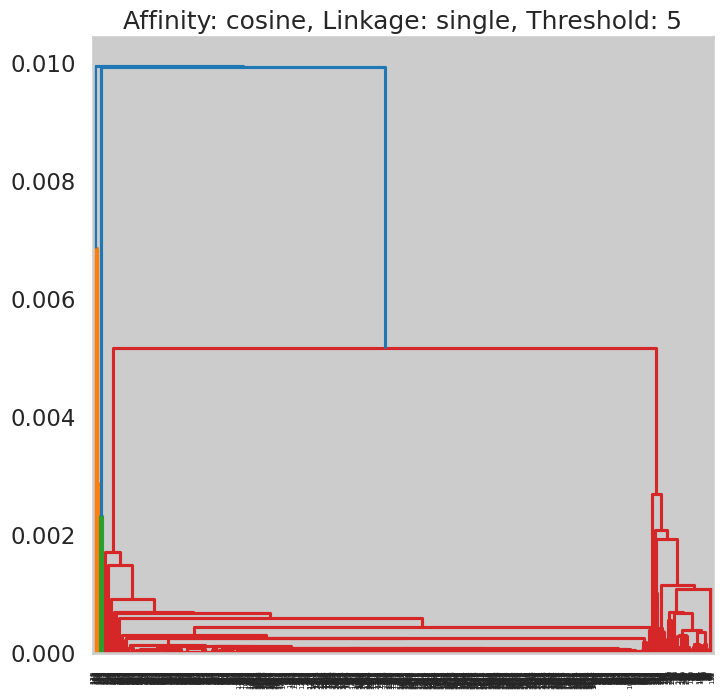

(np.float64(0.7598752691068684),
 <__main__.HierarchalClusteringParams at 0x7e6e4d7389e0>)

In [56]:
from enum import Enum

class AgglomerativeAffinity(Enum):
    EUCLIDEAN = "euclidean"
    MANHATTAN = "manhattan"
    COSINE = "cosine"


class AgglomerativeLinkage(Enum):
    AVERAGE = "average"
    SINGLE = "single"


class HierarchalClusteringParams:
    def __init__(self, 
                 affinity: AgglomerativeAffinity, 
                 linkage: AgglomerativeLinkage, 
                 distance_threshold: float):
        self.affinity = affinity
        self.linkage = linkage
        self.distance_threshold = distance_threshold

    def __str__(self):
        return f"affinity: {self.affinity}, linkage: {self.linkage}, distance_threshold: {self.distance_threshold}"


def get_best_params_from_agglomerative(data_points):
    sil_scores = []
    params = []
    thresholds = [0.1, 1, 5]

    for affinity in AgglomerativeAffinity:
        print(f"For affinity {affinity.value}")
        for linkage in AgglomerativeLinkage:
            for threshold in thresholds:
                clusterer = AgglomerativeClustering(n_clusters=None, 
                                                    metric=affinity.value, 
                                                    linkage=linkage.value, 
                                                    distance_threshold=threshold)
                
                plt.title(f"Affinity: {affinity.value}, Linkage: {linkage.value}, Threshold: {threshold}")
                plot_dendrogram(clusterer.fit(data_points))
                plt.show()

                try:
                    sil_scores.append(silhouette_score(X=data_points, labels=clusterer.labels_, metric=affinity.value,))
                    params.append(HierarchalClusteringParams(affinity, linkage, threshold))
                except:
                    continue
    
    return (max(sil_scores), params[sil_scores.index(max(sil_scores))])


                

get_best_params_from_agglomerative(Multi_blob_Data)

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

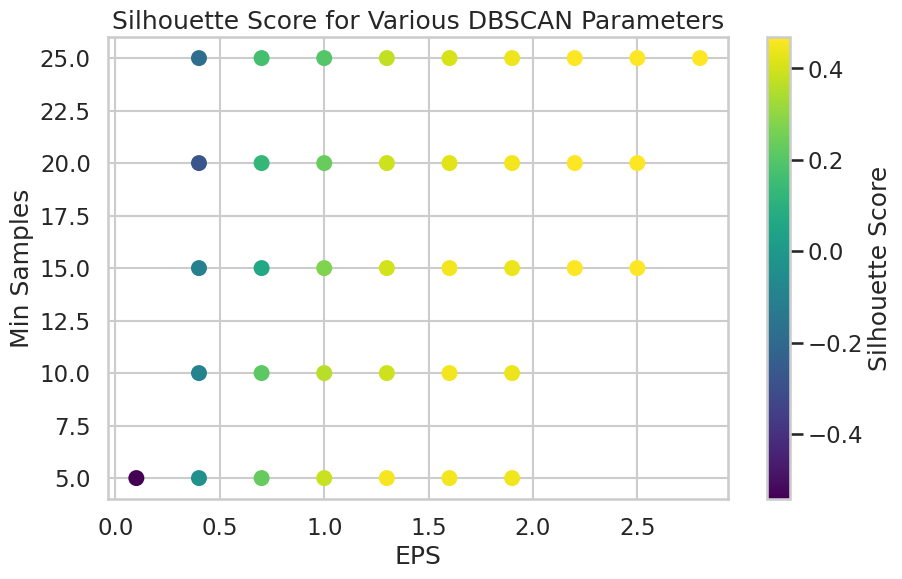

Best Silhouette Score: 0.4685207355522043
Best EPS: 2.2000000000000006
Best Min Samples: 15


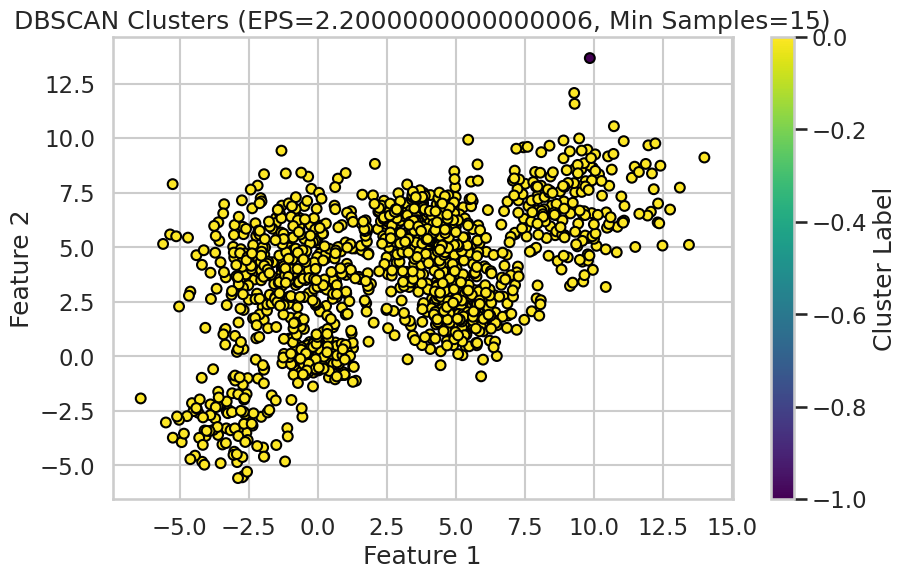

In [57]:
def get_best_params_dbscan(data_set):
    silhouette_scores = []
    eps_values = np.arange(0.1, 3.1, 0.3)
    min_samples_values = np.arange(5, 26, 5)
    best_score = -1
    best_eps = None
    best_min_samples = None

    plt.figure(figsize=(10, 6))

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data_set)
            
            if len(set(labels)) > 1:
                score = silhouette_score(data_set, labels)
                silhouette_scores.append((eps, min_samples, score))
                
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples

    silhouette_scores = np.array(silhouette_scores)
    plt.scatter(silhouette_scores[:, 0], silhouette_scores[:, 1], c=silhouette_scores[:, 2], cmap='viridis', s=100)
    plt.colorbar(label='Silhouette Score')
    plt.xlabel('EPS')
    plt.ylabel('Min Samples')
    plt.title('Silhouette Score for Various DBSCAN Parameters')
    plt.show()

    print(f"Best Silhouette Score: {best_score}")
    print(f"Best EPS: {best_eps}")
    print(f"Best Min Samples: {best_min_samples}")

    return (best_score, best_eps, best_min_samples)

(best_score, best_eps, best_min_samples) = get_best_params_dbscan(Multi_blob_Data)

dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_best = dbscan_best.fit_predict(Multi_blob_Data)

plt.figure(figsize=(10, 6))
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels_best, cmap='viridis', marker='o', edgecolors='k', s=50)
plt.title(f"DBSCAN Clusters (EPS={best_eps}, Min Samples={best_min_samples})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

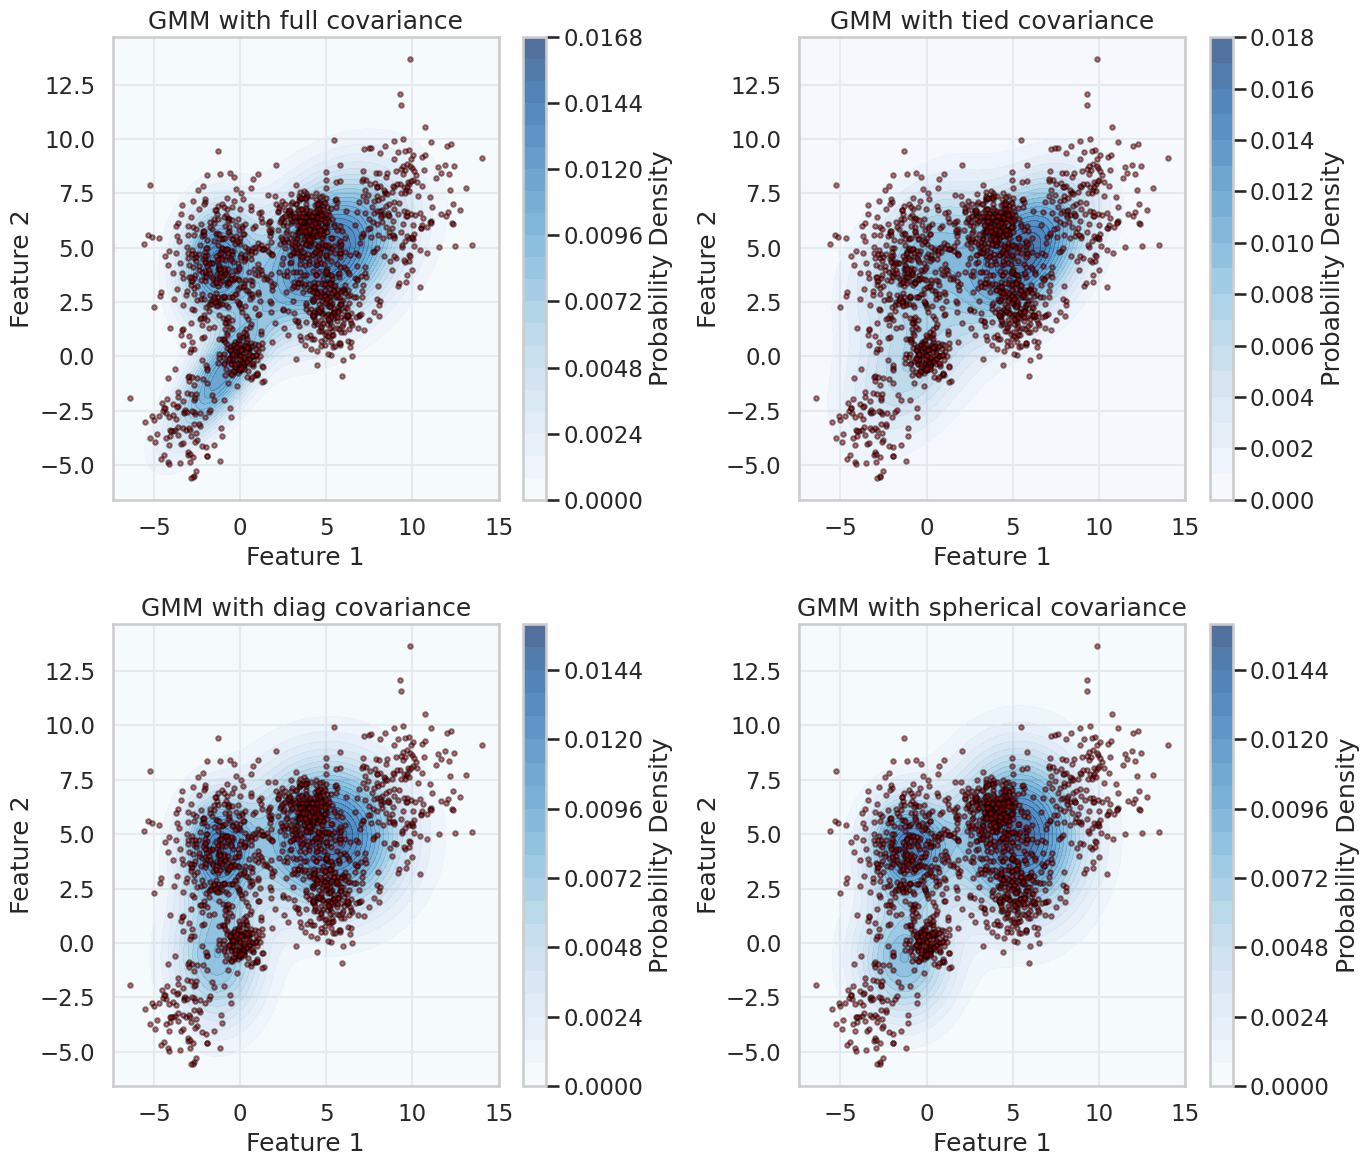

In [58]:
def plot_gaussian_mixture(data_set):
    covariance_types = ['full', 'tied', 'diag', 'spherical']

    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    for i, covariance_type in enumerate(covariance_types):
        ax = axes[i // 2, i % 2]
        
        gmm = GaussianMixture(n_components=3, covariance_type=covariance_type, random_state=42)
        gmm.fit(data_set)
        
        x_min, x_max = data_set[:, 0].min() - 1, data_set[:, 0].max() + 1
        y_min, y_max = data_set[:, 1].min() - 1, data_set[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
        Z = np.array([gmm.score_samples(np.array([[x, y]])) for x, y in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        
        contour = ax.contourf(xx, yy, np.exp(Z), levels=20, cmap='Blues', alpha=0.7)
        ax.scatter(data_set[:, 0], data_set[:, 1], s=10, c='red', edgecolors='k', marker='o', alpha=0.5)
        
        ax.set_title(f'GMM with {covariance_type} covariance')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')

        cbar = plt.colorbar(contour, ax=ax)
        cbar.set_label('Probability Density')

    plt.tight_layout()
    plt.show()


plot_gaussian_mixture(Multi_blob_Data)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [59]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

Running Kmeans with 3 clusters


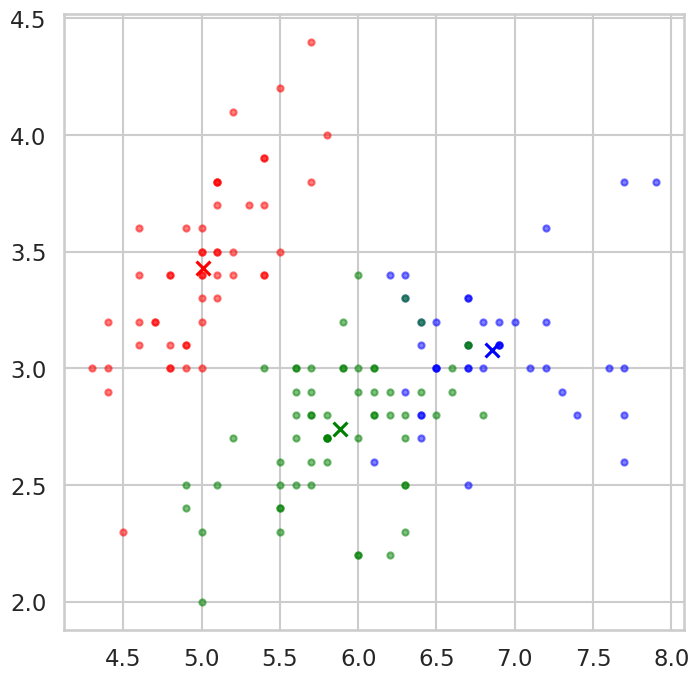

Running Kmeans with 5 clusters


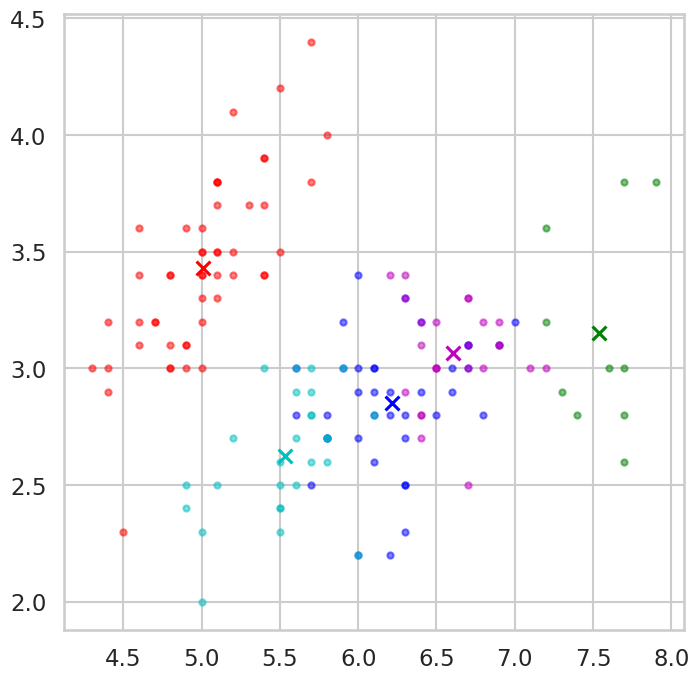

Running Kmeans with 7 clusters


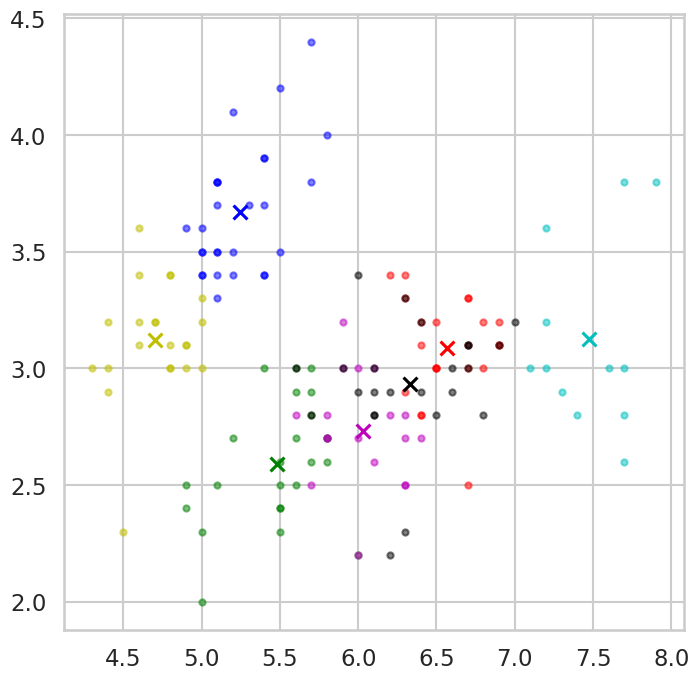

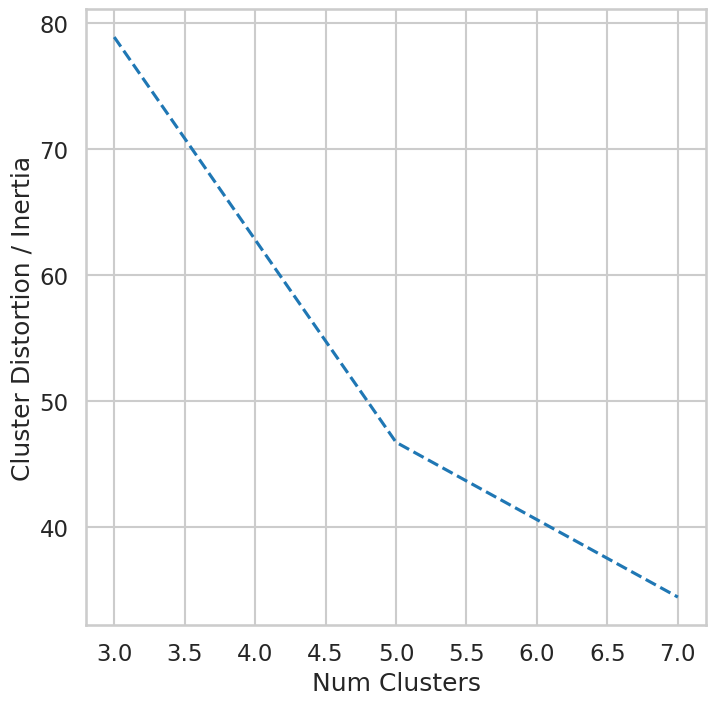

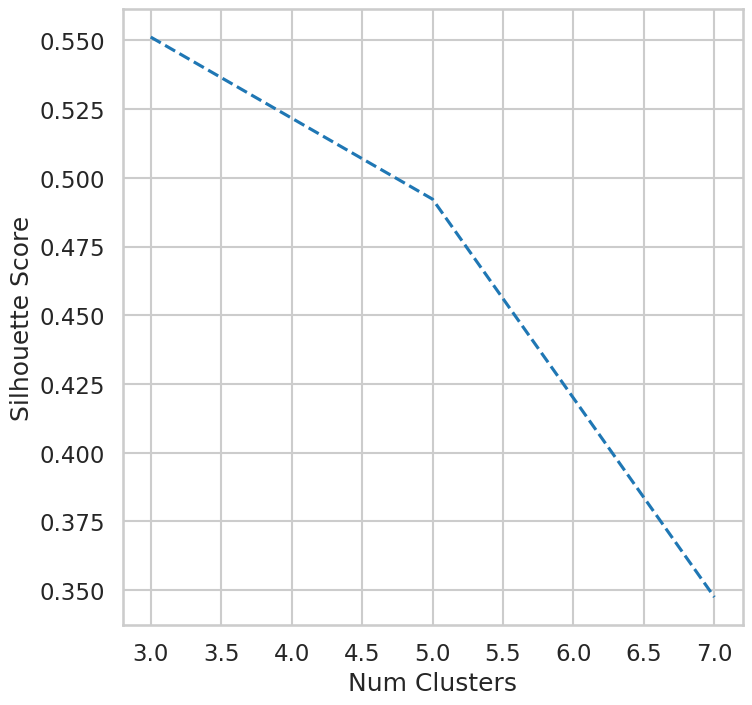

Best K: 3, score: 0.5511916046195919
For affinity euclidean


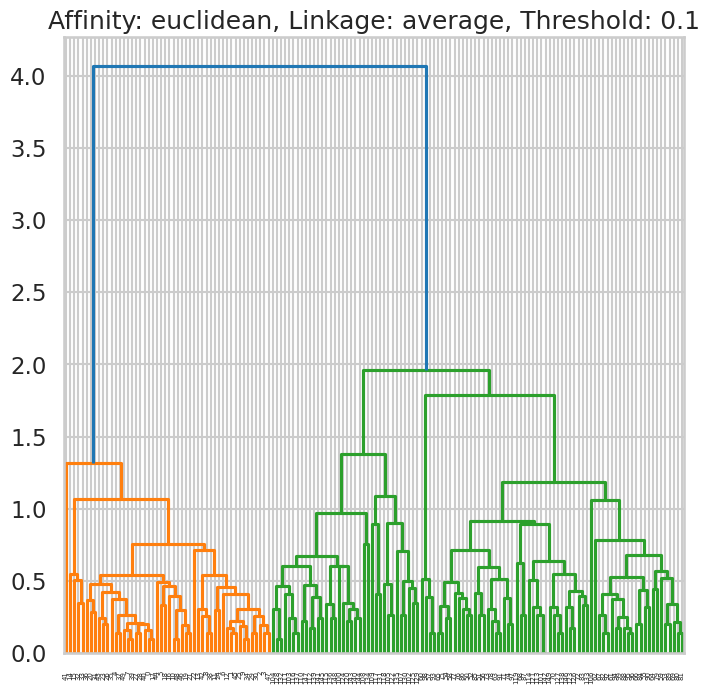

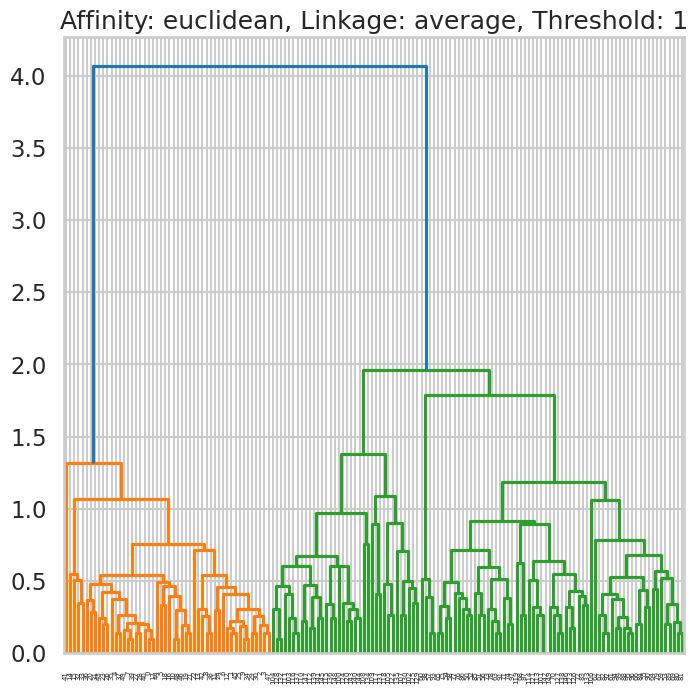

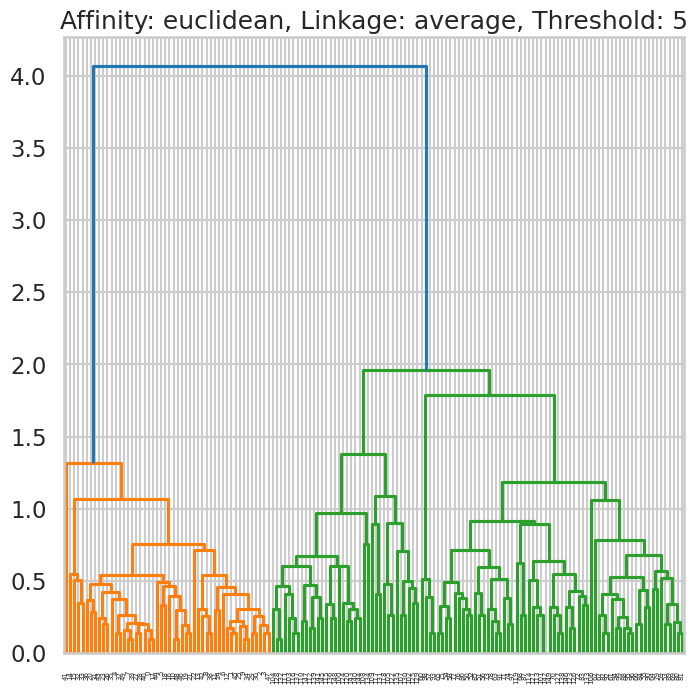

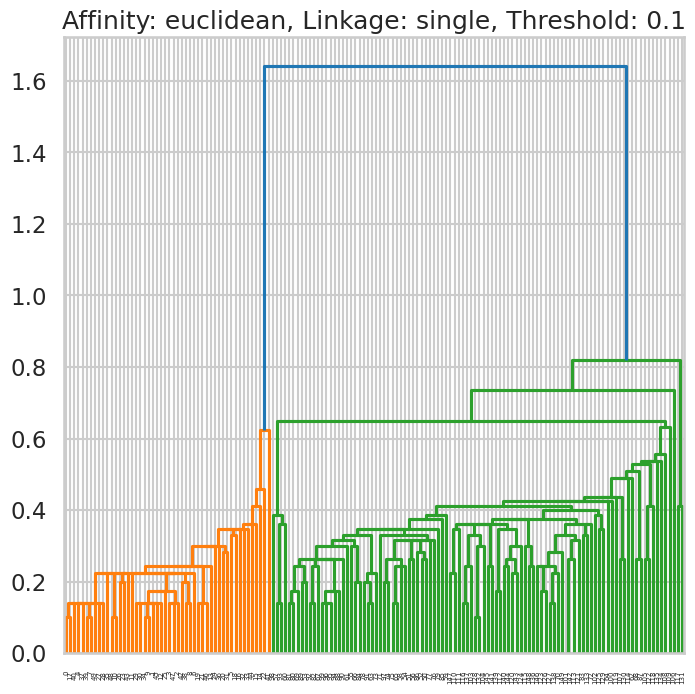

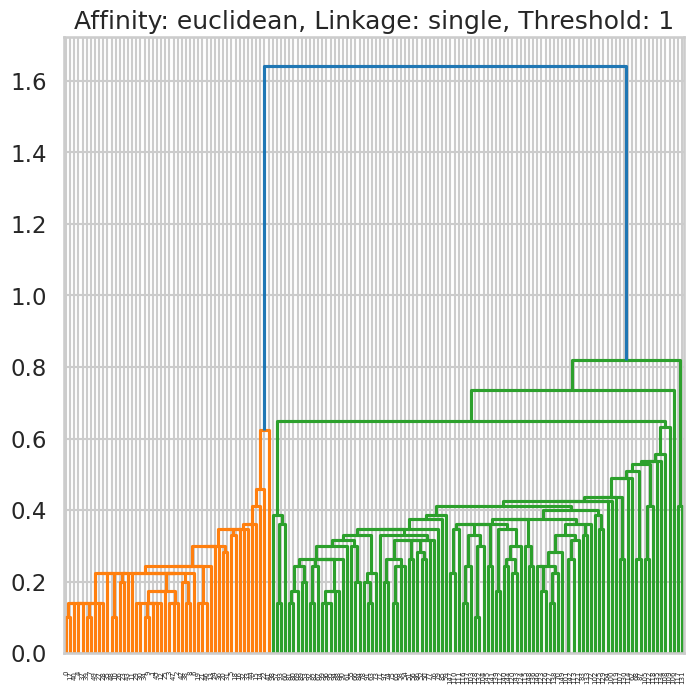

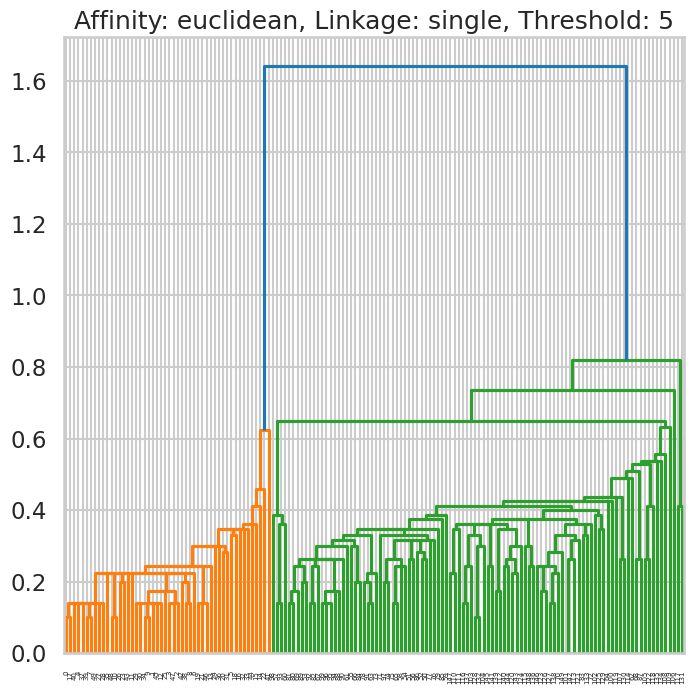

For affinity manhattan


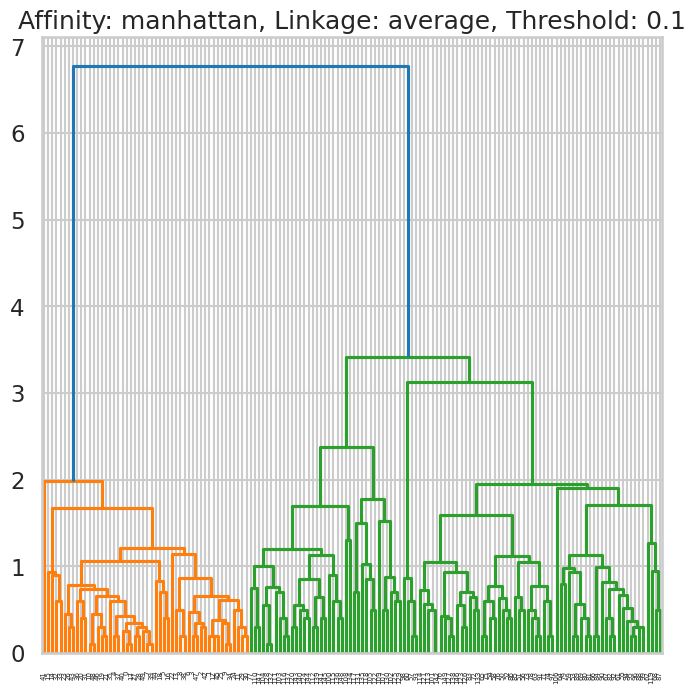

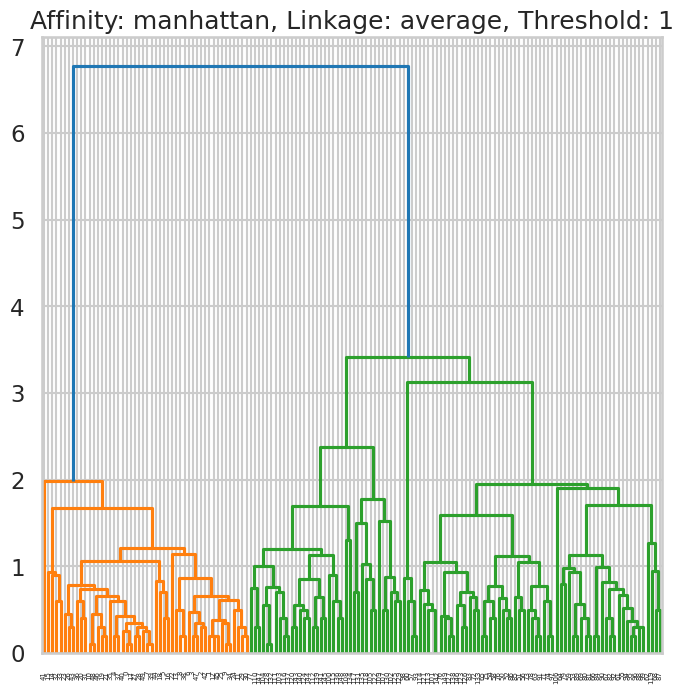

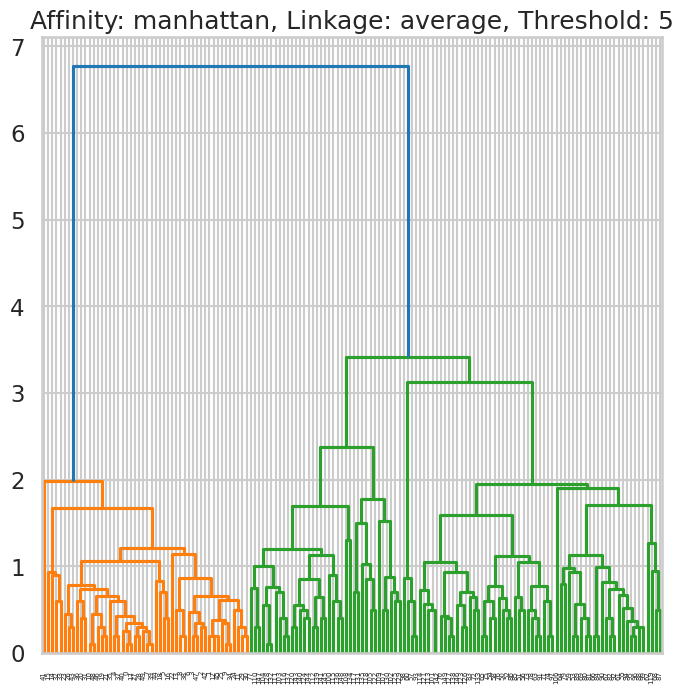

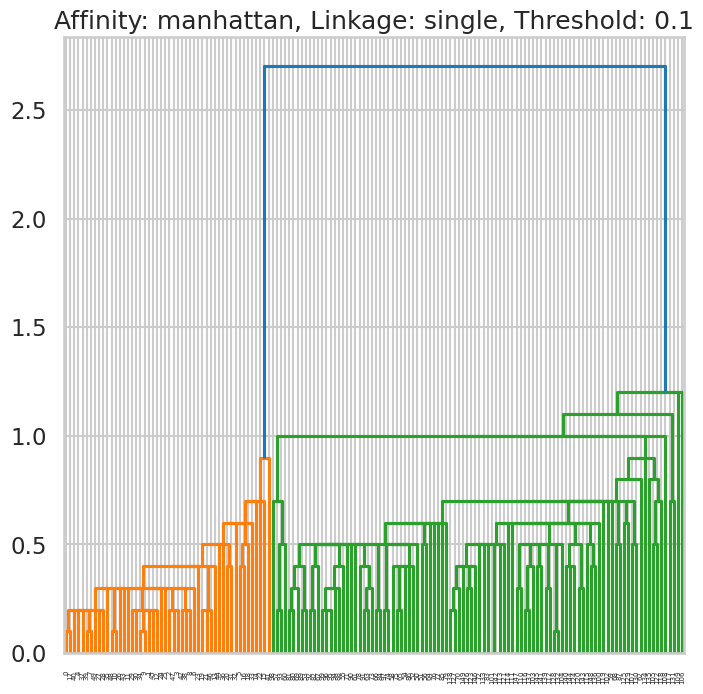

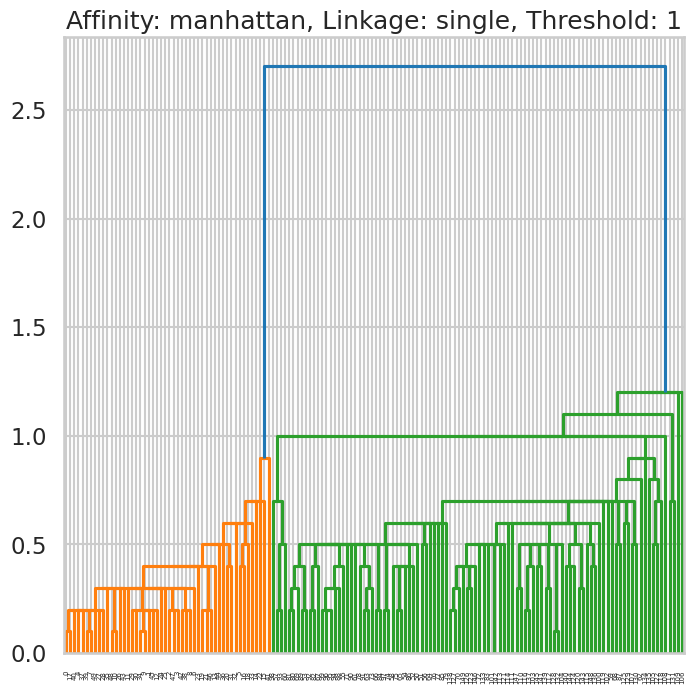

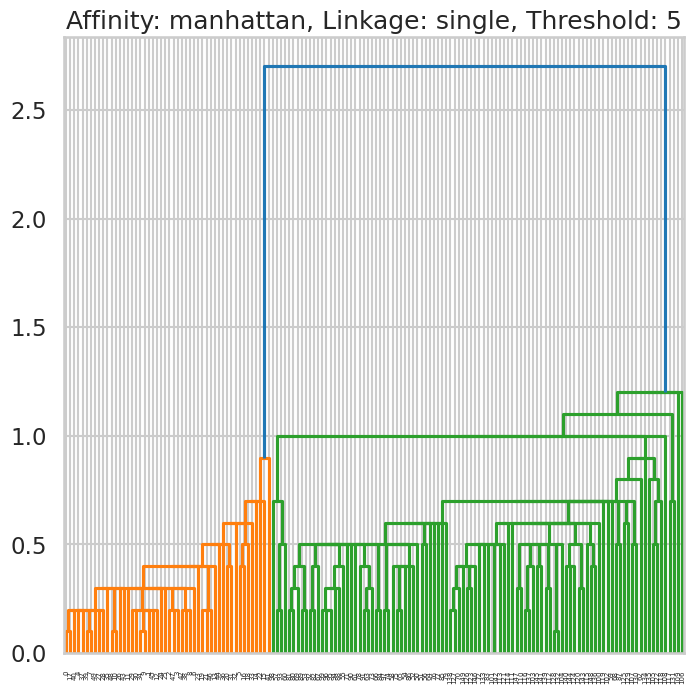

For affinity cosine


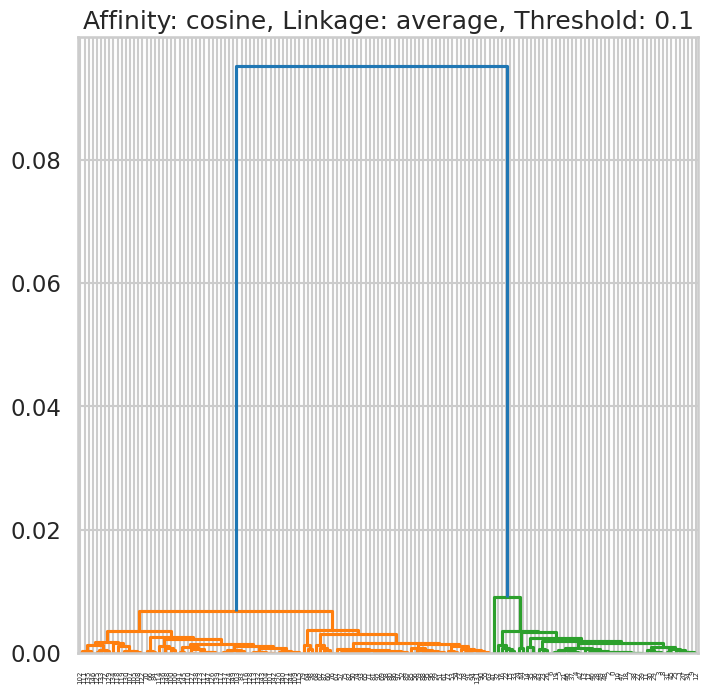

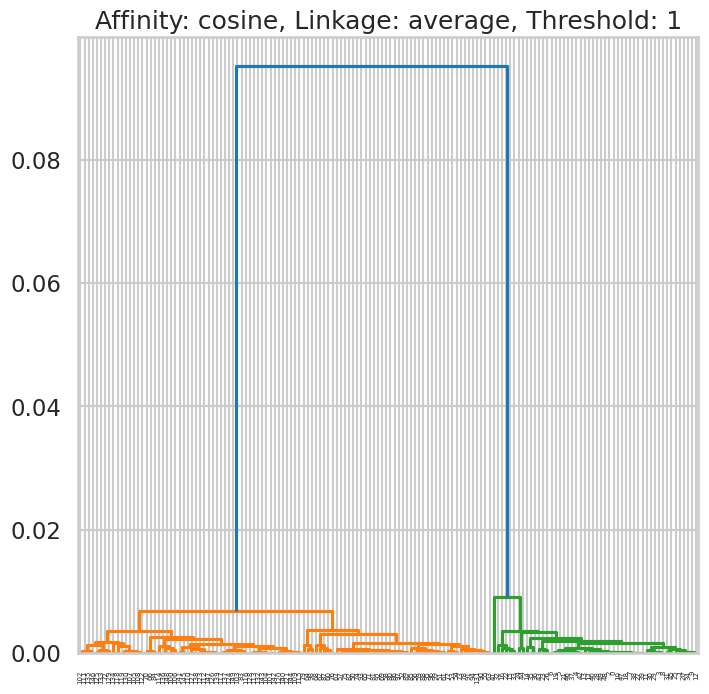

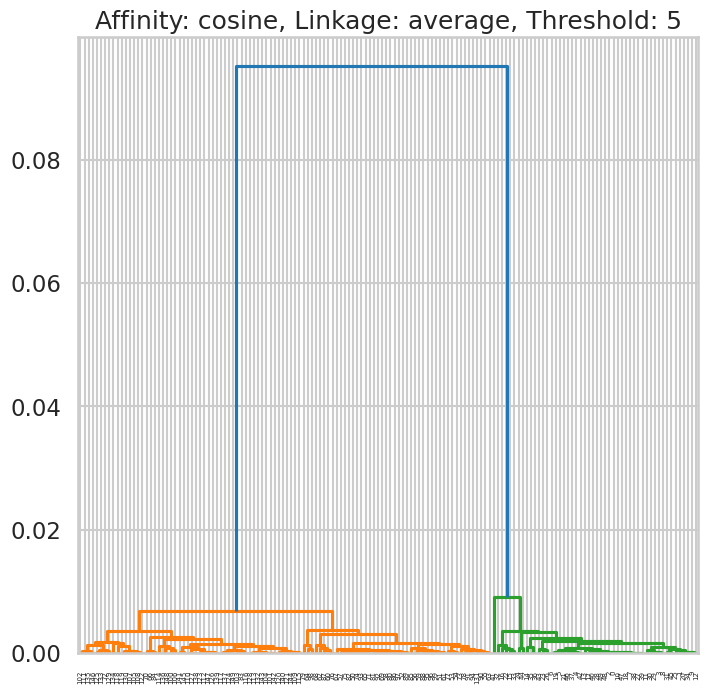

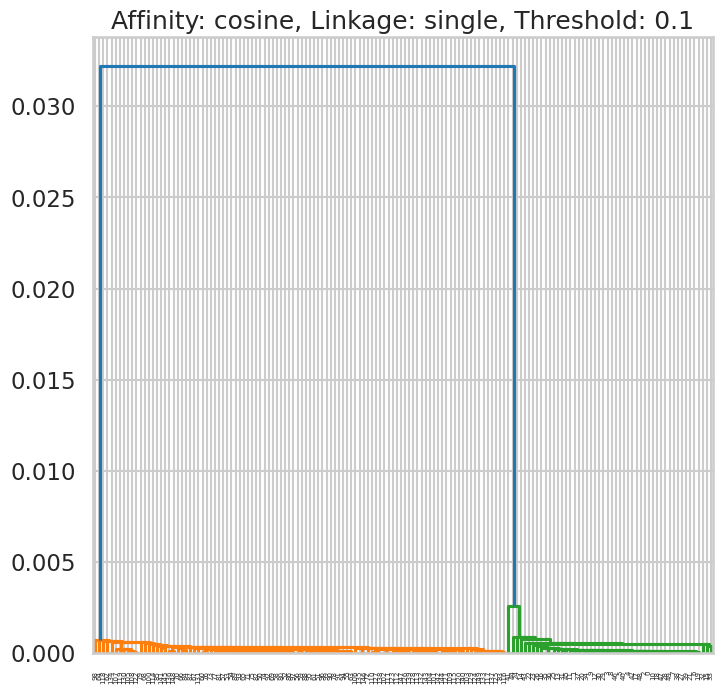

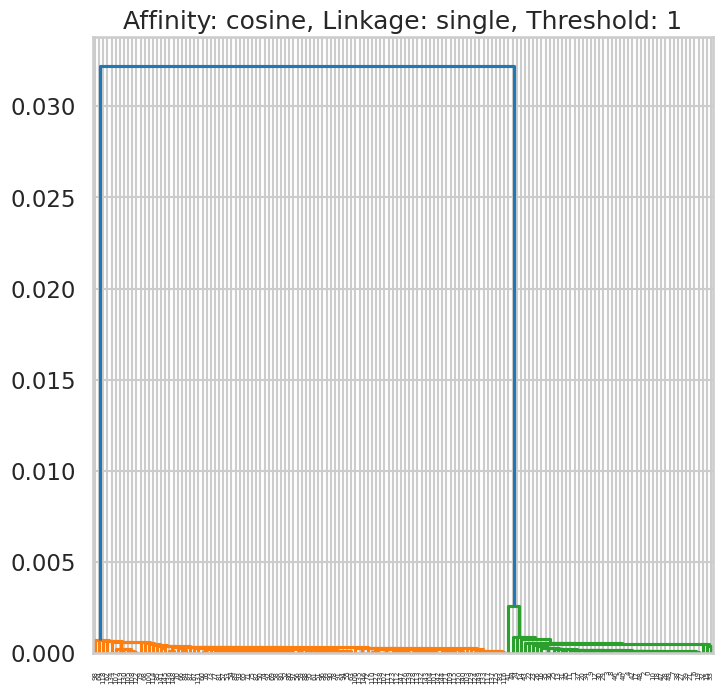

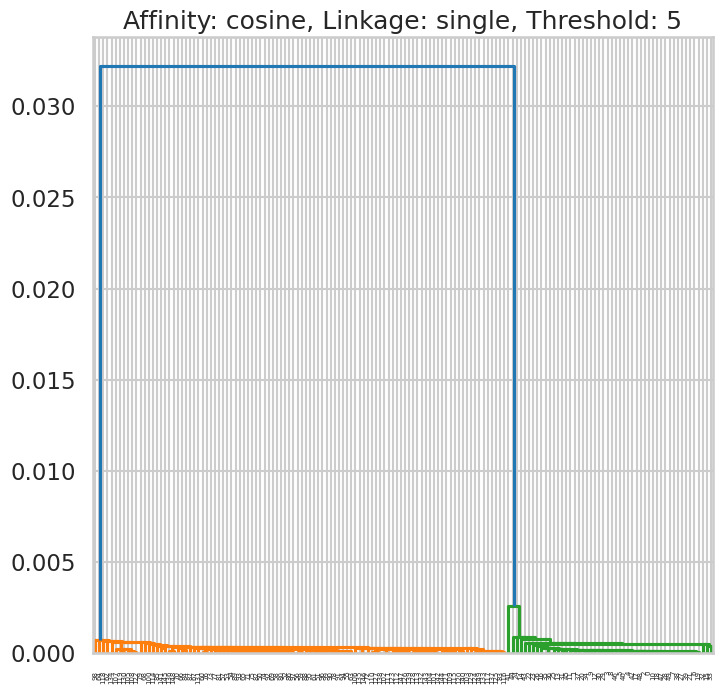

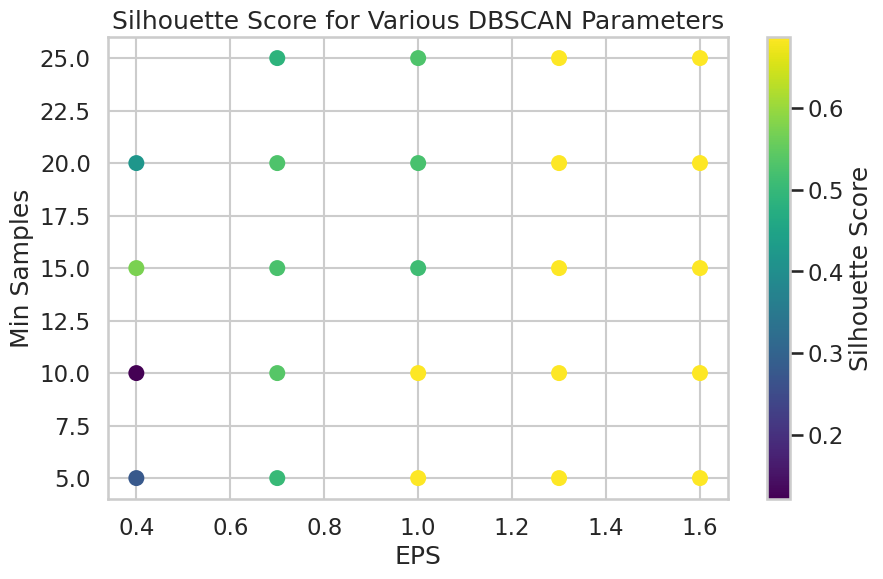

Best Silhouette Score: 0.6867350732769776
Best EPS: 1.0000000000000002
Best Min Samples: 5


ValueError: X has 2 features, but GaussianMixture is expecting 4 features as input.

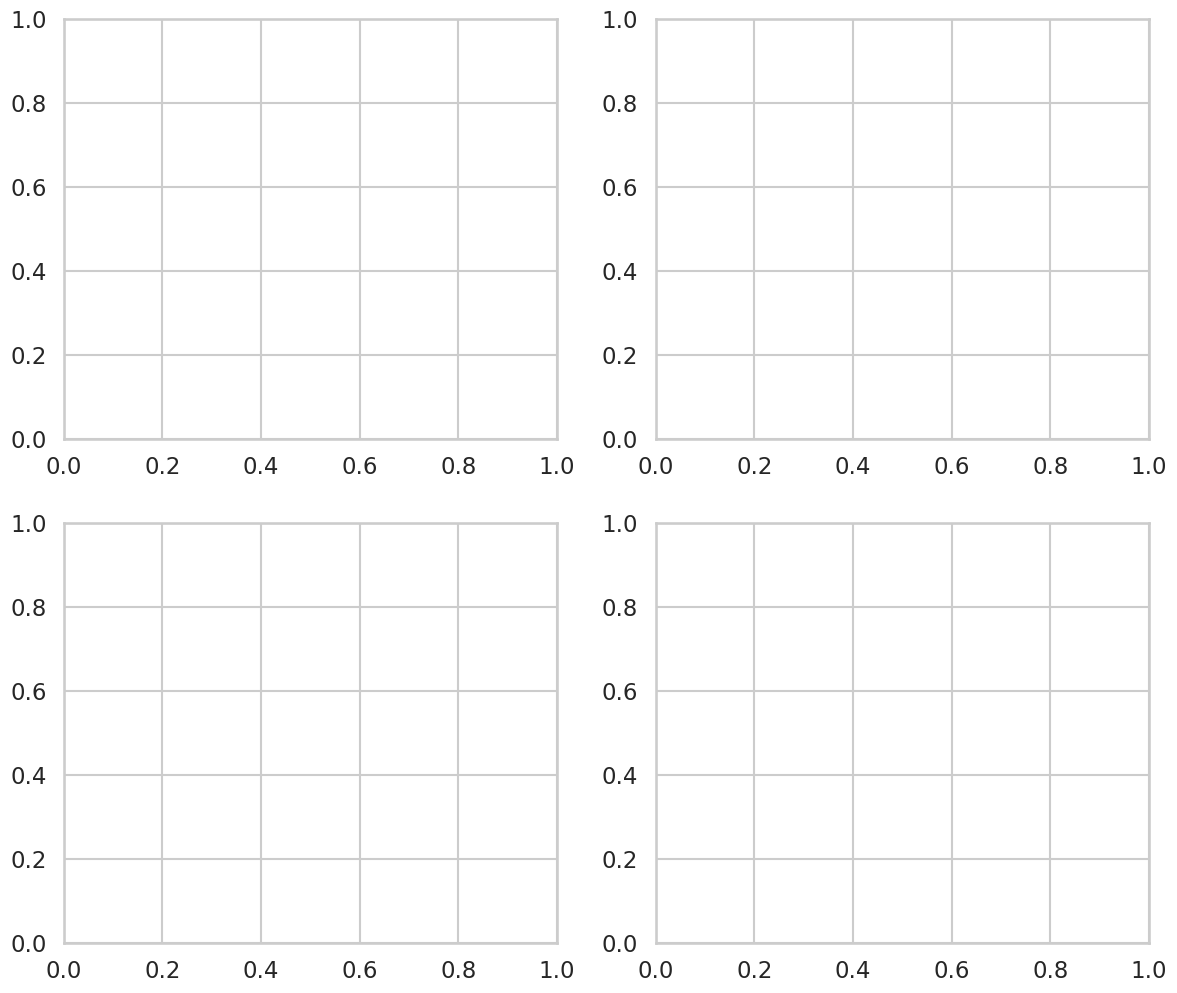

In [60]:
get_best_k_from_kmeans(iris_data.data)

get_best_params_from_agglomerative(iris_data.data)

get_best_params_dbscan(iris_data.data)

plot_gaussian_mixture(iris_data.data)

Running Kmeans with 3 clusters


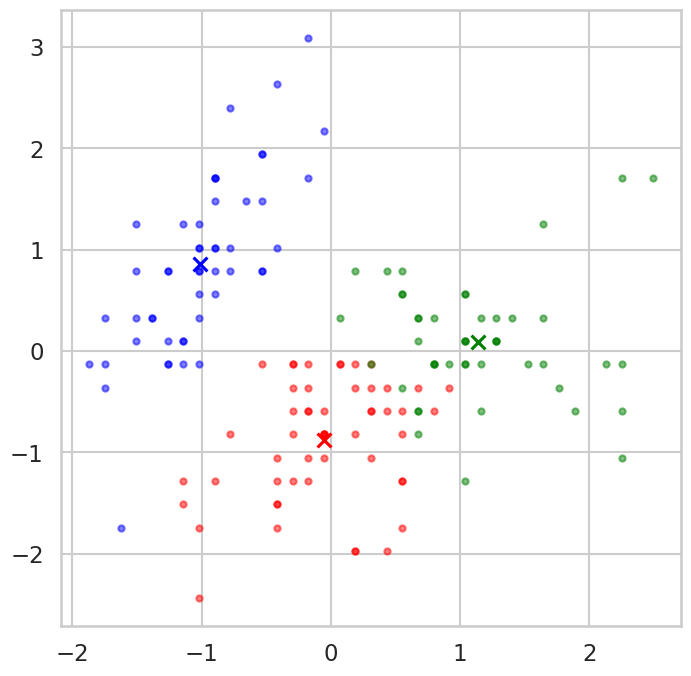

Running Kmeans with 5 clusters


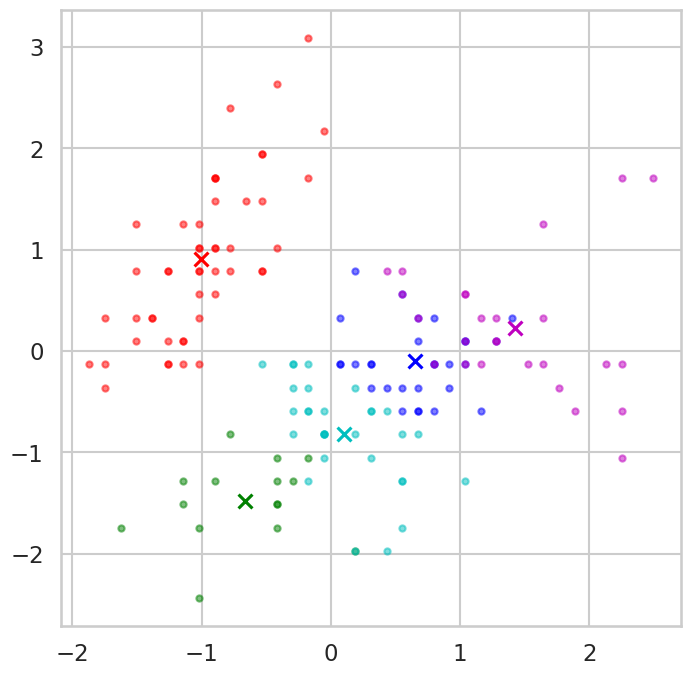

Running Kmeans with 7 clusters


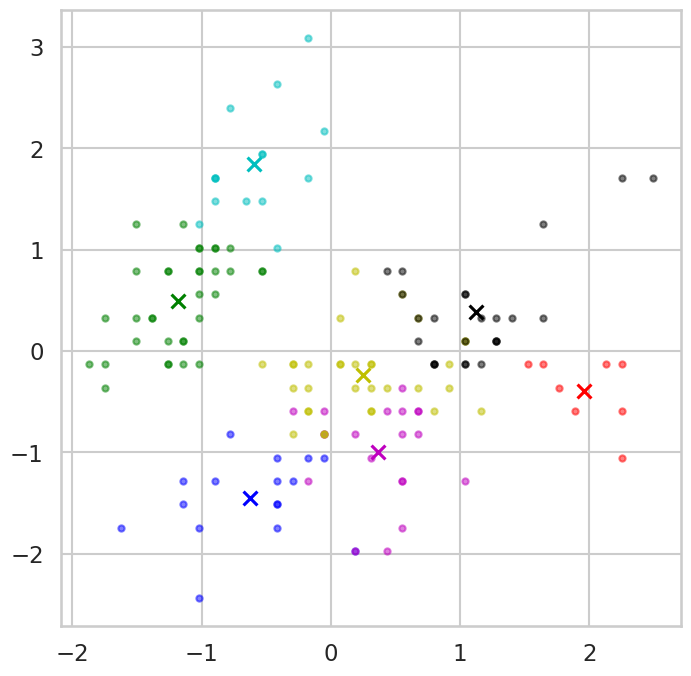

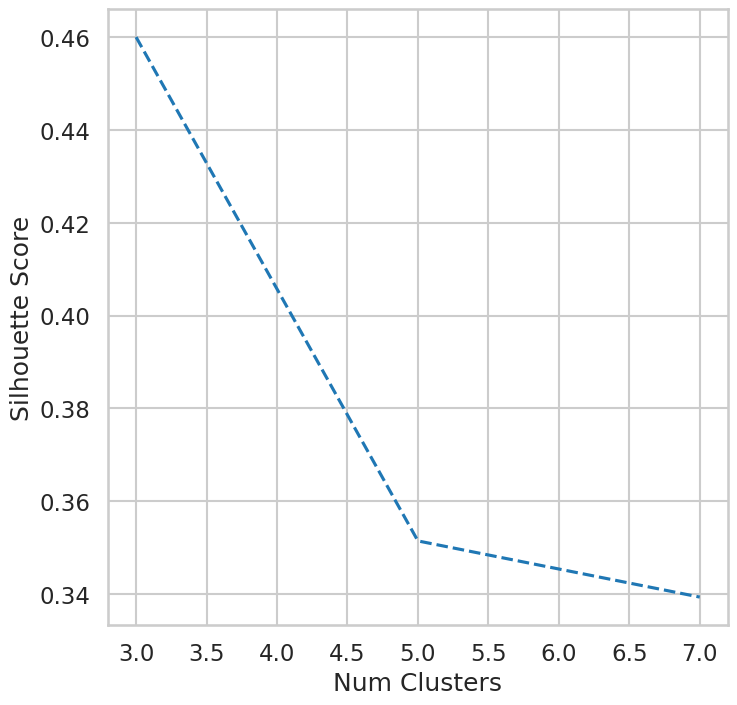

Best K: 3, score: 0.45994823920518635
For affinity euclidean


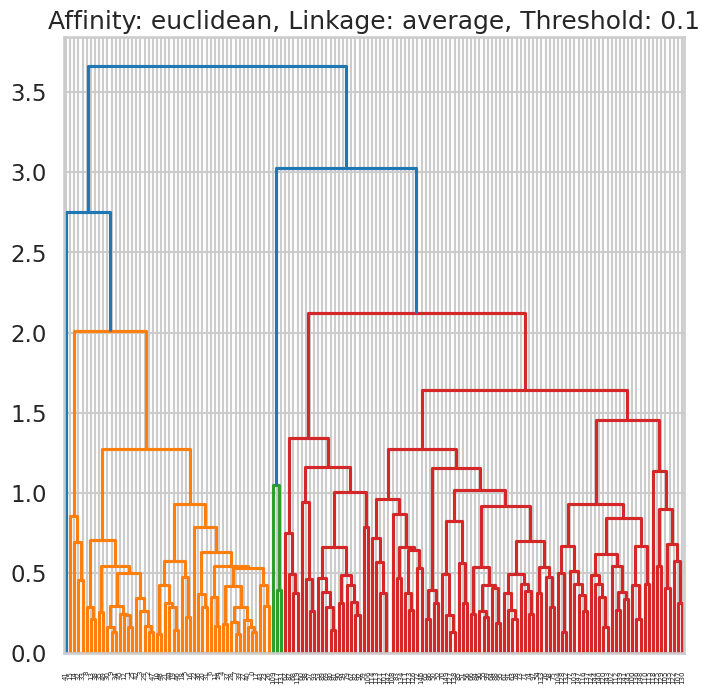

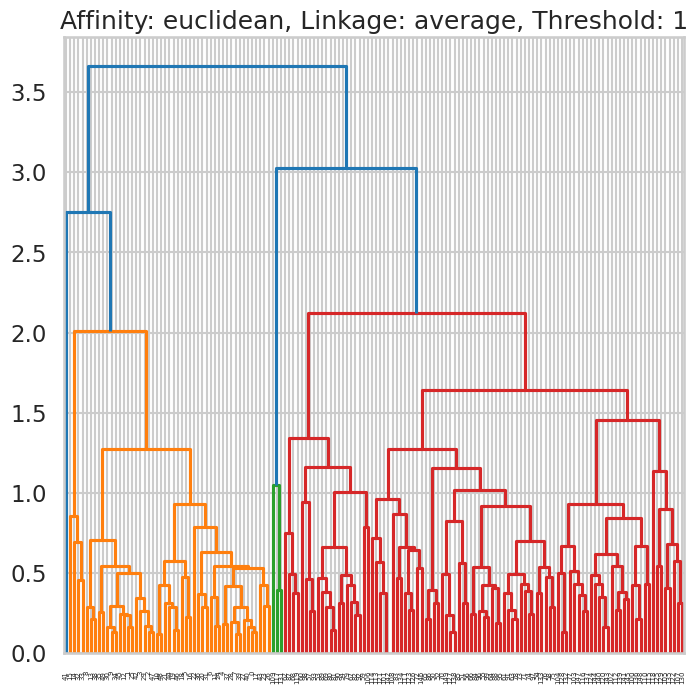

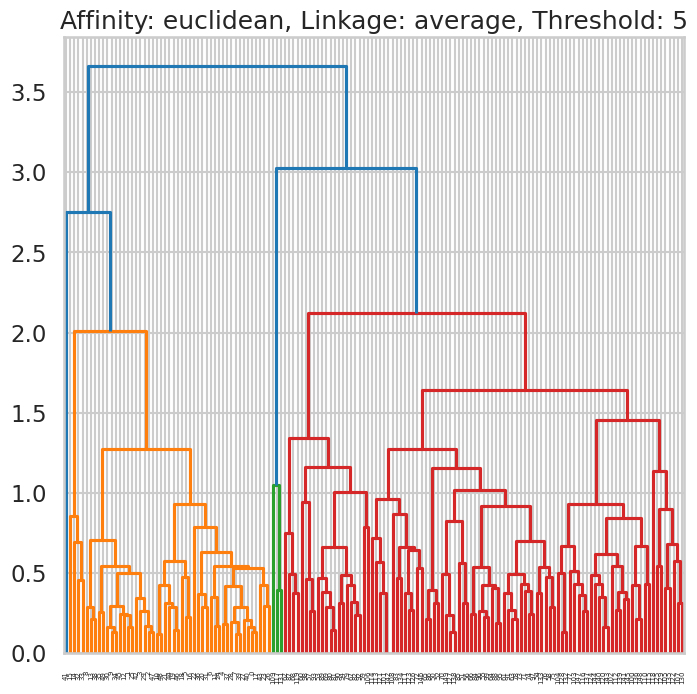

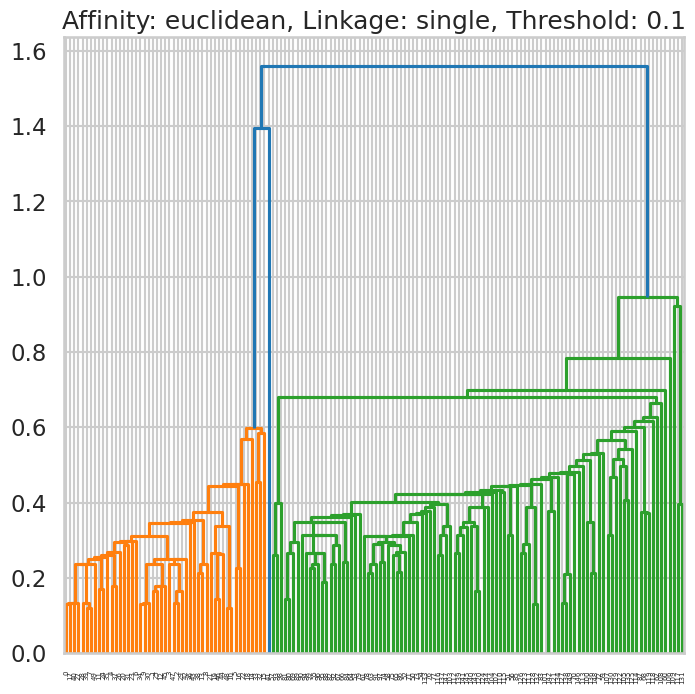

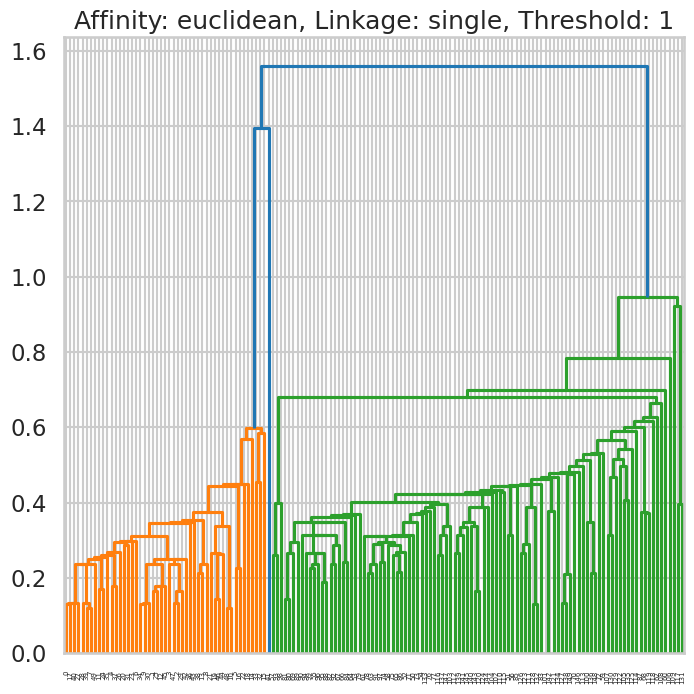

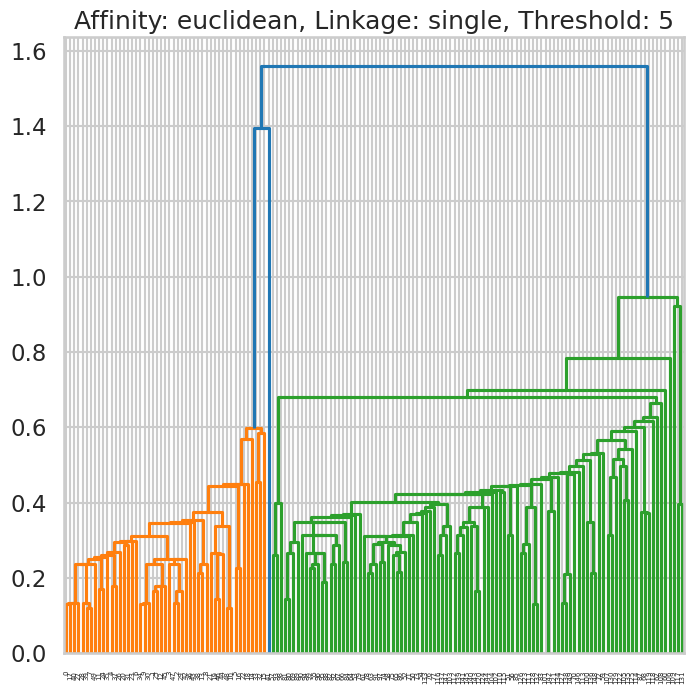

For affinity manhattan


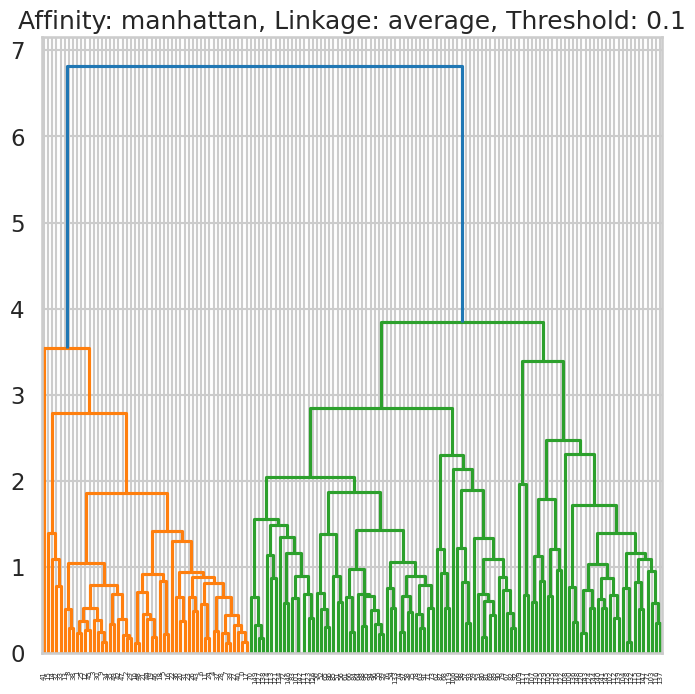

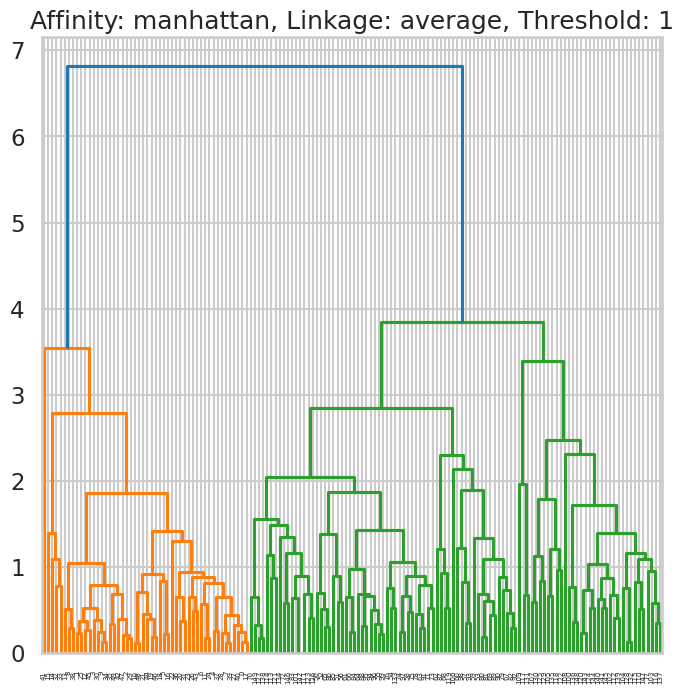

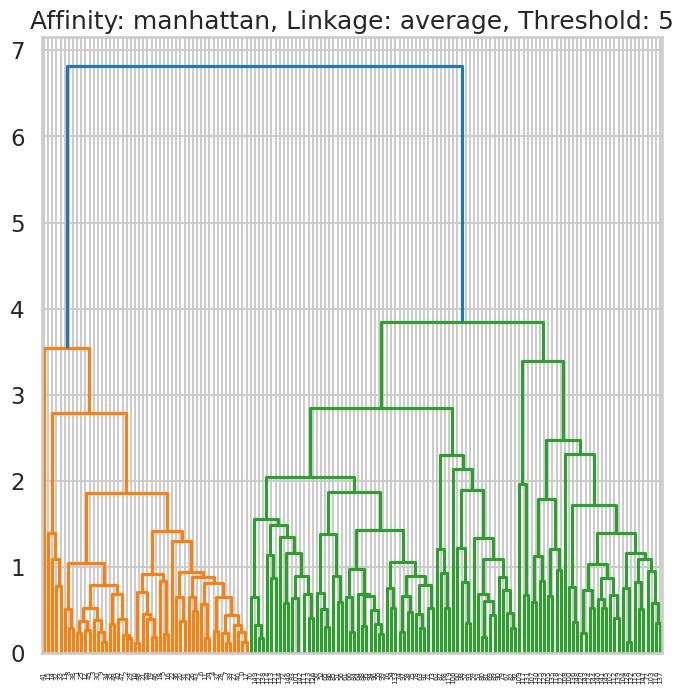

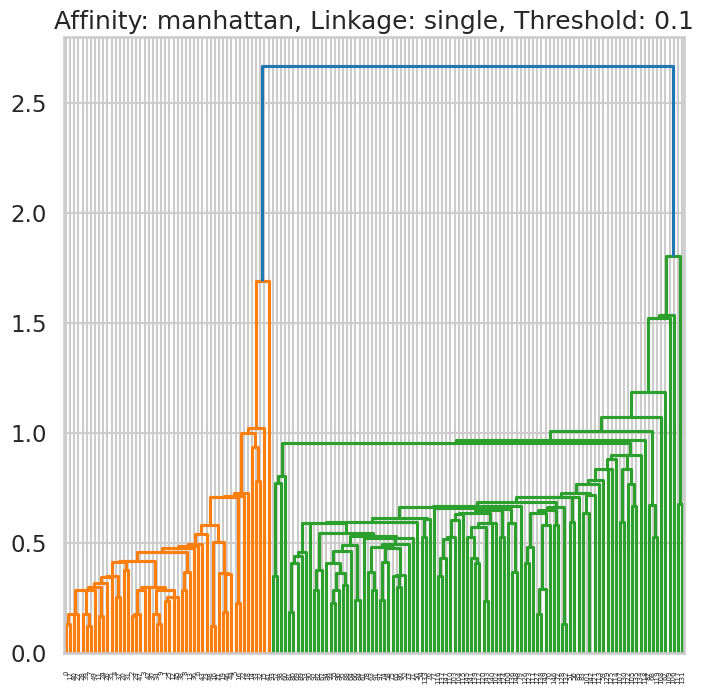

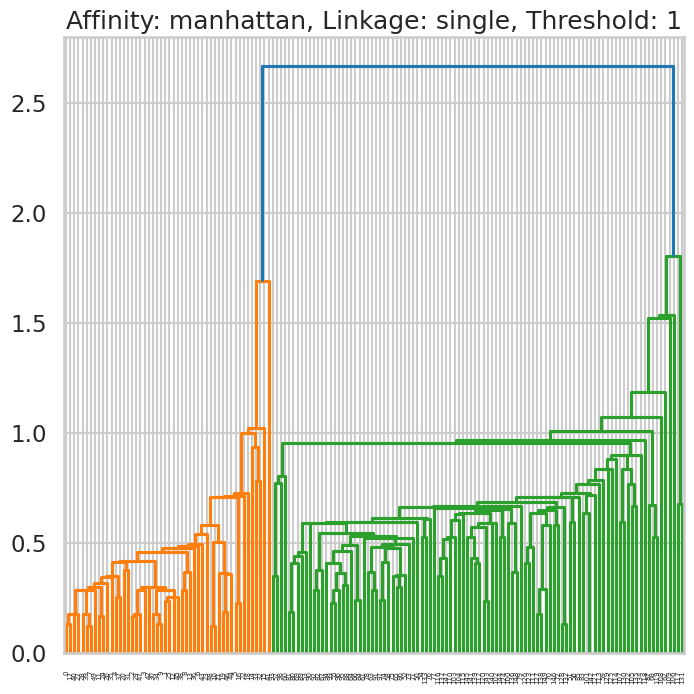

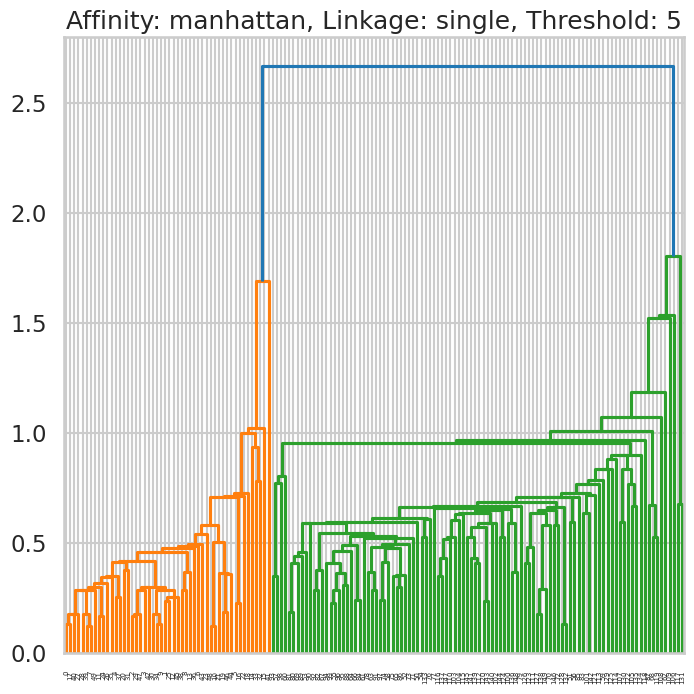

For affinity cosine


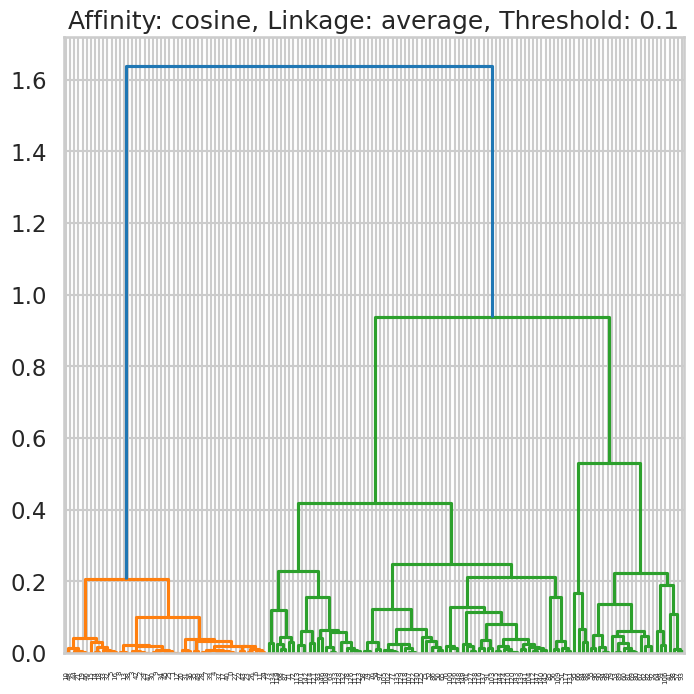

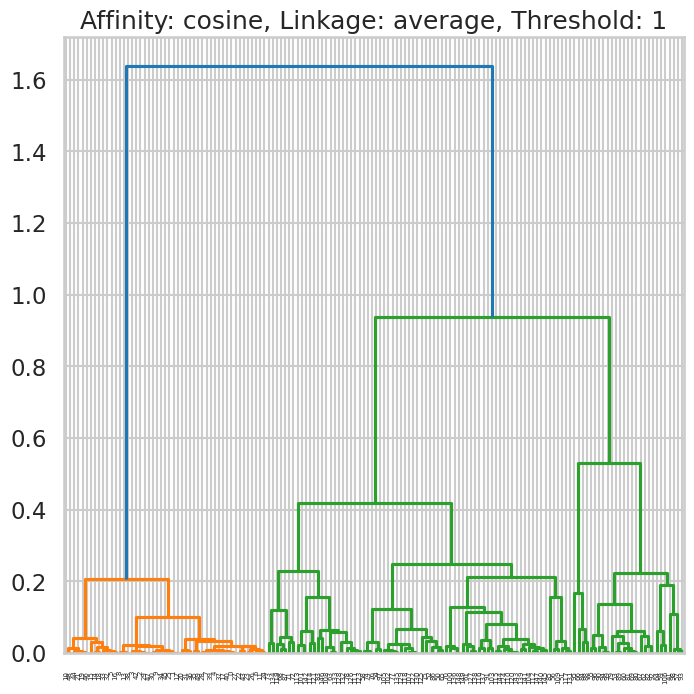

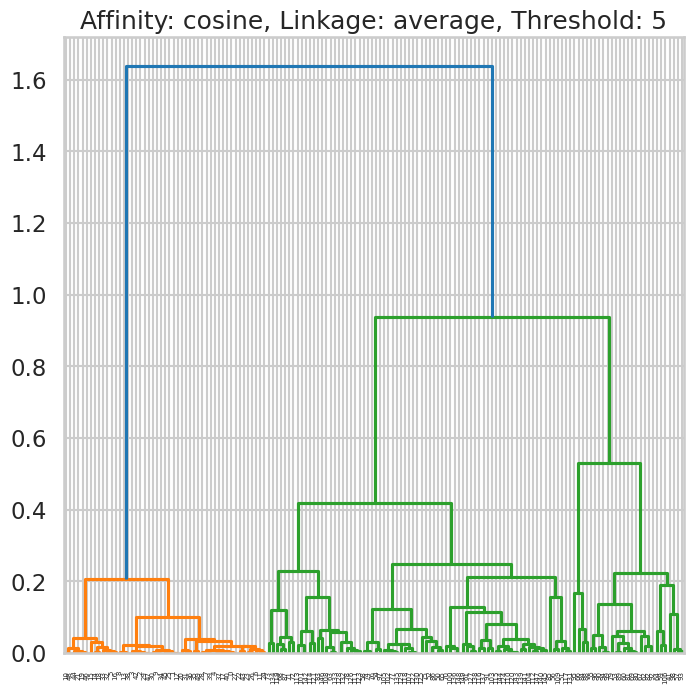

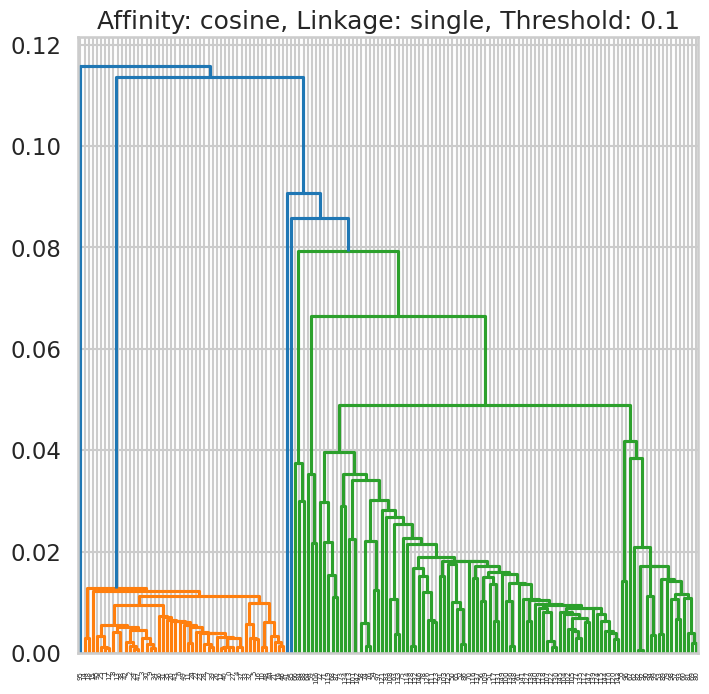

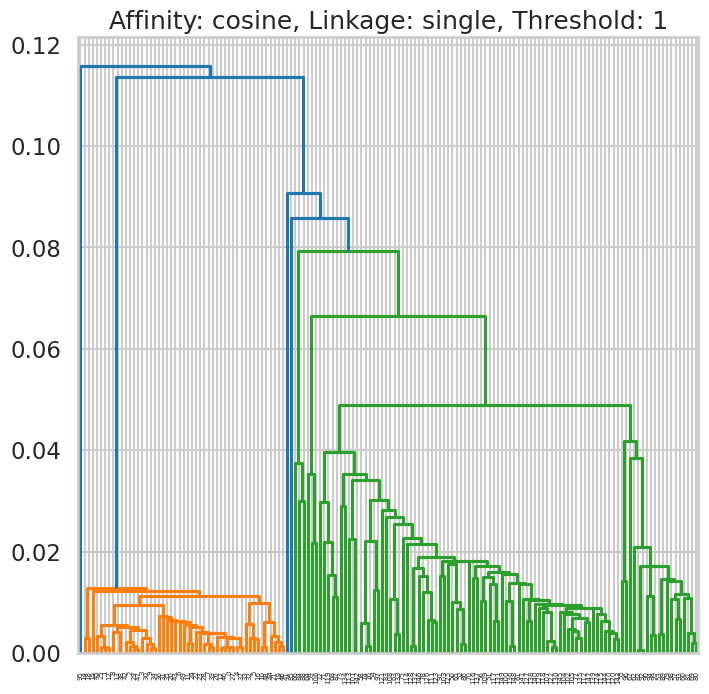

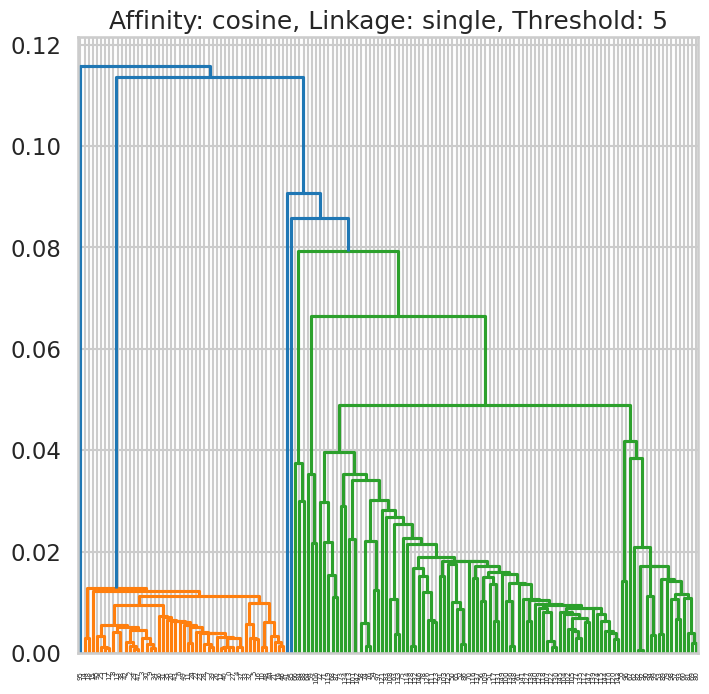

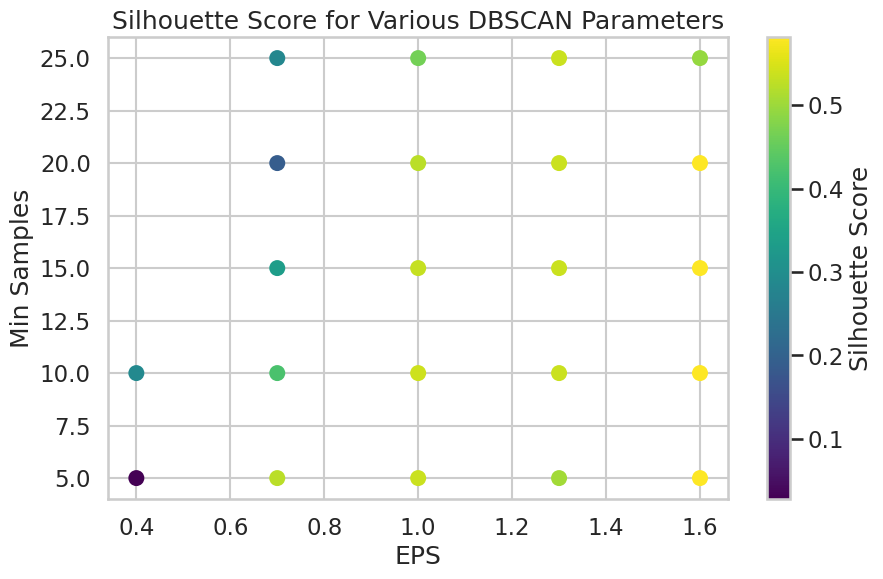

Best Silhouette Score: 0.5817500491982808
Best EPS: 1.6000000000000003
Best Min Samples: 5


ValueError: X has 2 features, but GaussianMixture is expecting 4 features as input.

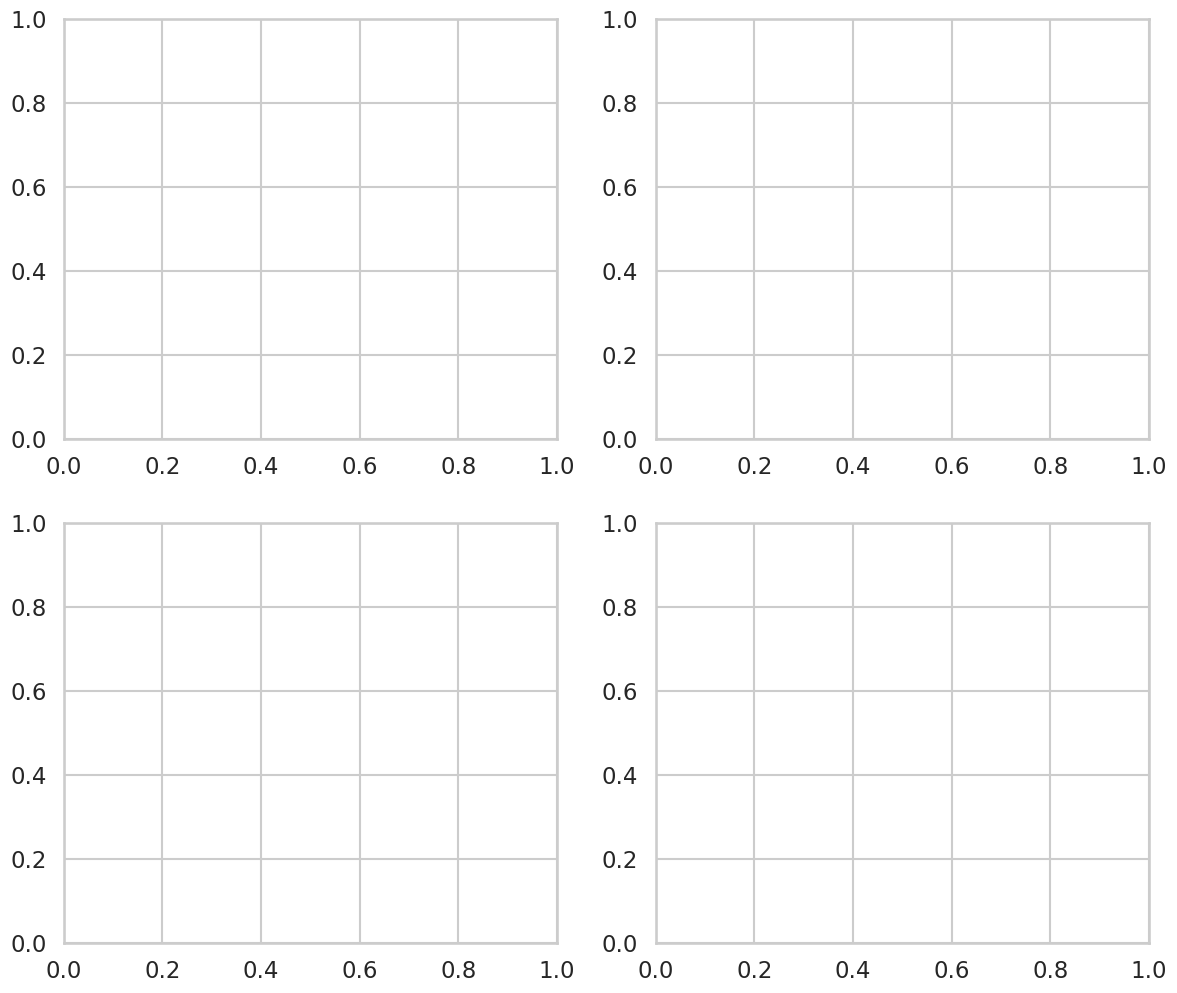

In [61]:
standardized_iris = StandardScaler().fit_transform(iris_data.data)

get_best_k_from_kmeans(standardized_iris)

get_best_params_from_agglomerative(standardized_iris)

get_best_params_dbscan(standardized_iris)

plot_gaussian_mixture(standardized_iris)

## Customer dataset
Repeat all the above on the customer data set 

In [62]:
df=pd.read_csv('Customer data.csv', usecols=['Education', 'Income'])

In [63]:
df.head()

Education  Income
0          2  124670
1          1  150773
2          1   89210
3          1  171565
4          1  149031

# K Means

(2000, 2)
Running Kmeans with 3 clusters


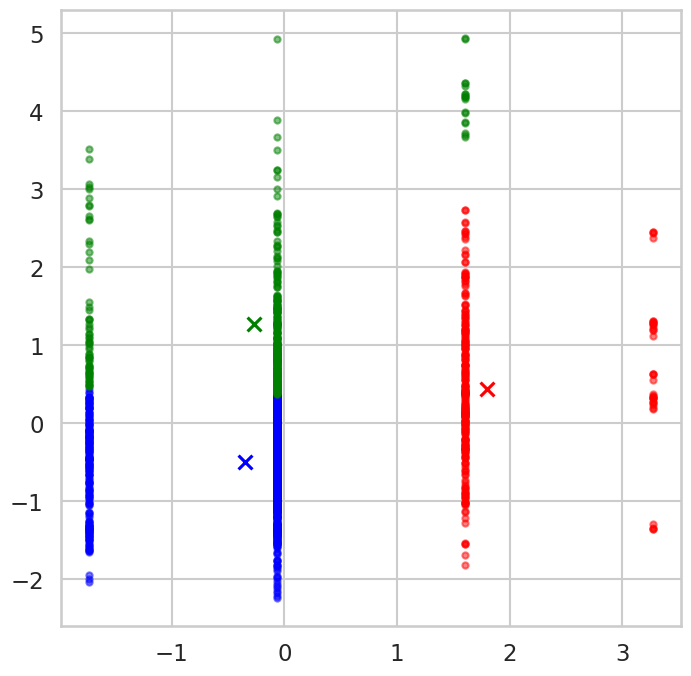

Running Kmeans with 5 clusters


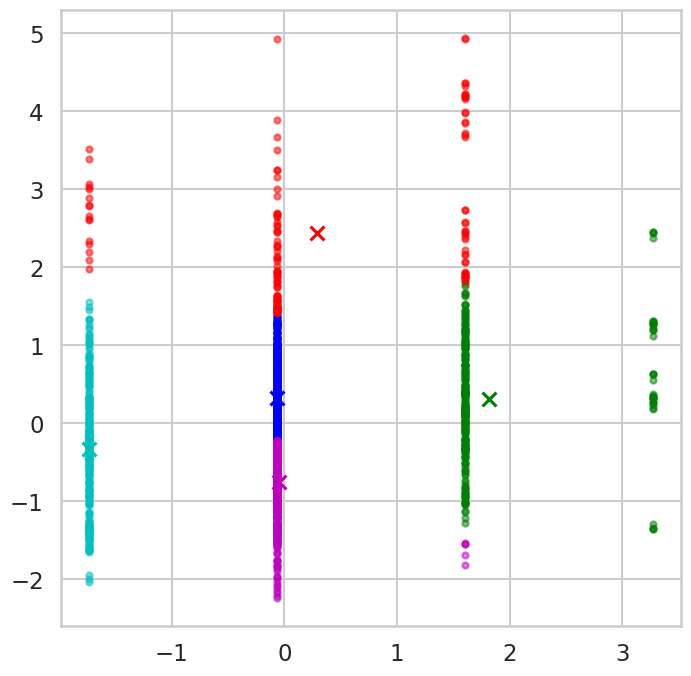

Running Kmeans with 7 clusters


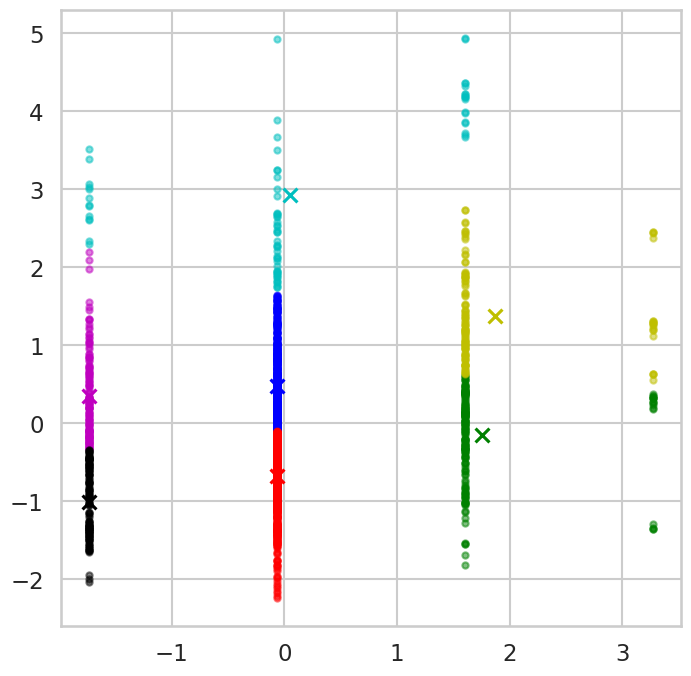

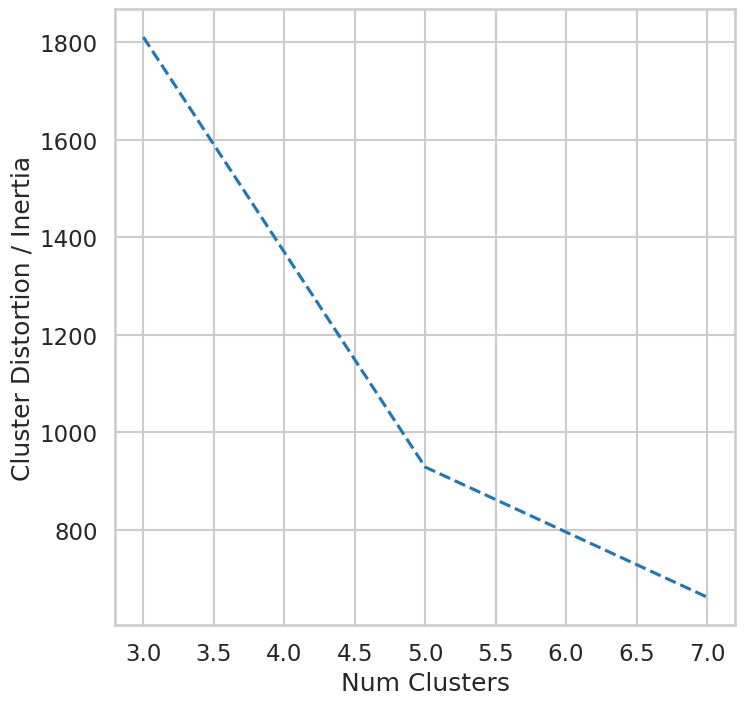

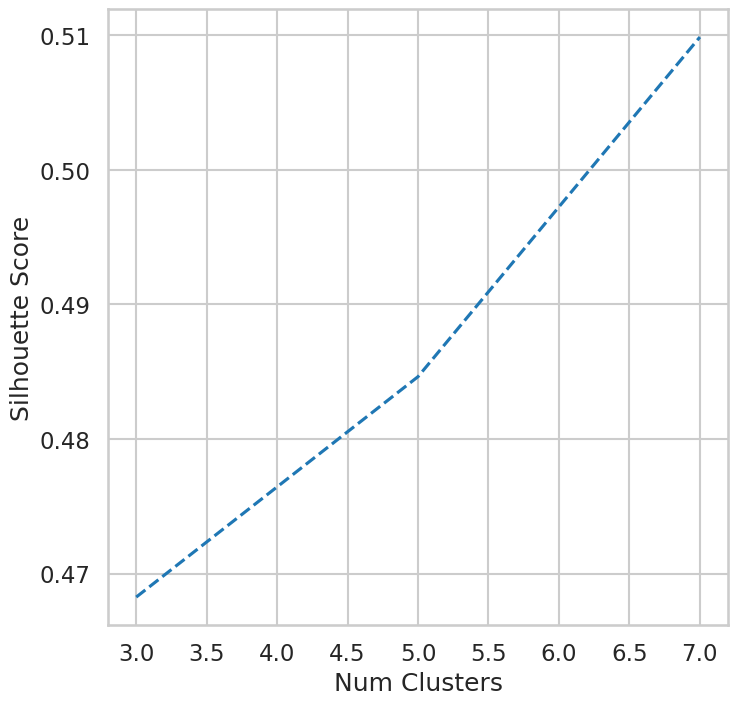

Best K: 7, score: 0.5098688350020012


(7, np.float64(0.5098688350020012))

In [64]:
customer_dataset = StandardScaler().fit_transform(df)
print(customer_dataset.shape)

get_best_k_from_kmeans(customer_dataset)


# Hierarchical

For affinity euclidean


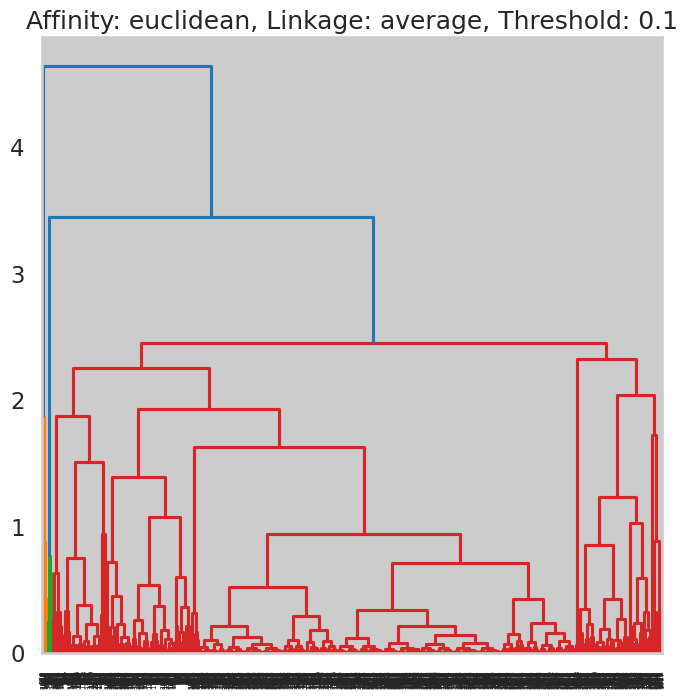

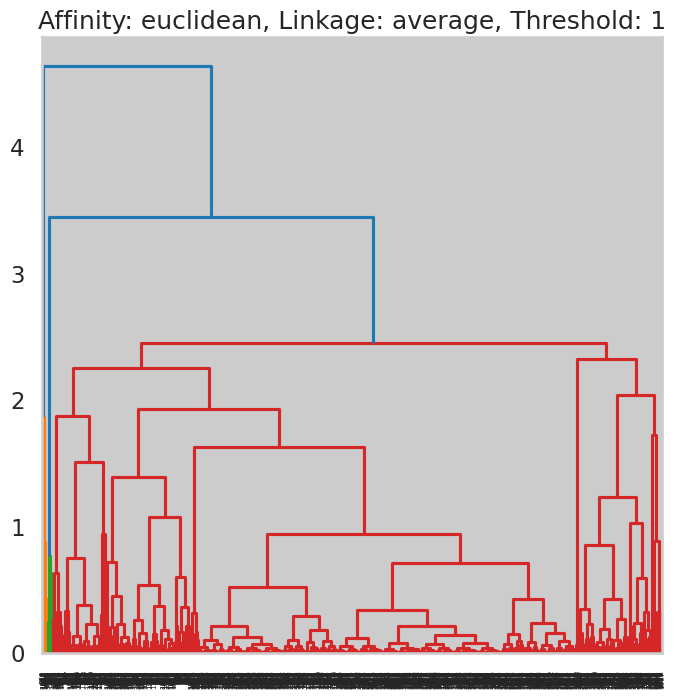

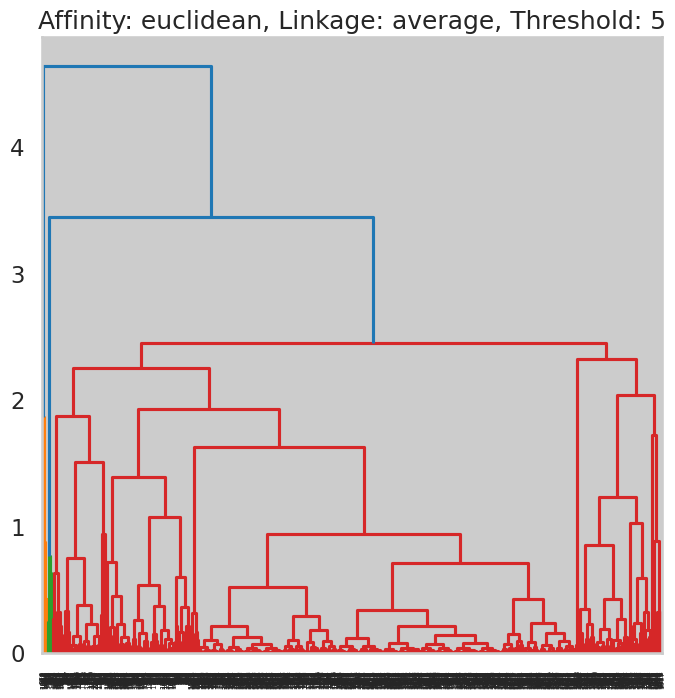

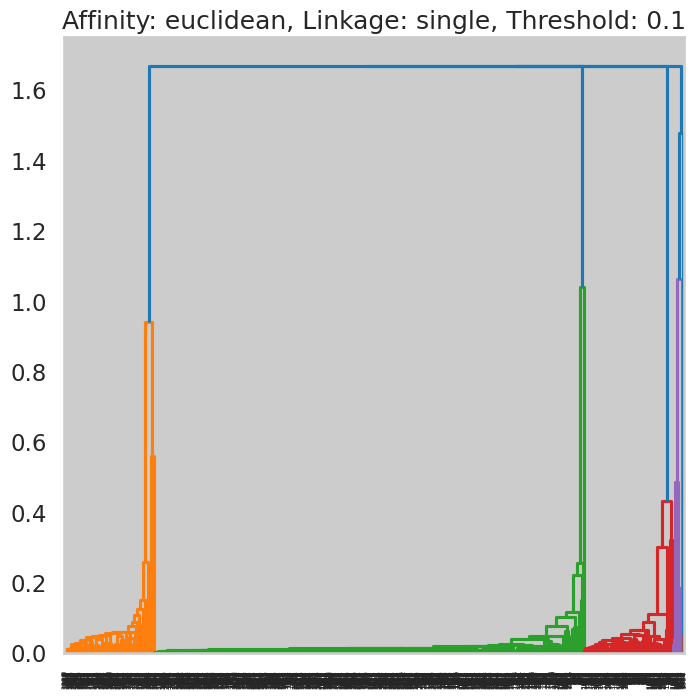

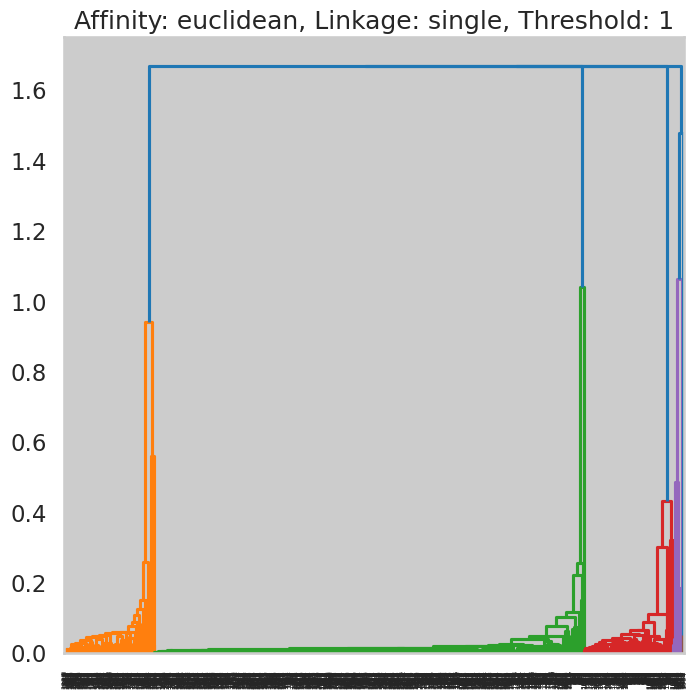

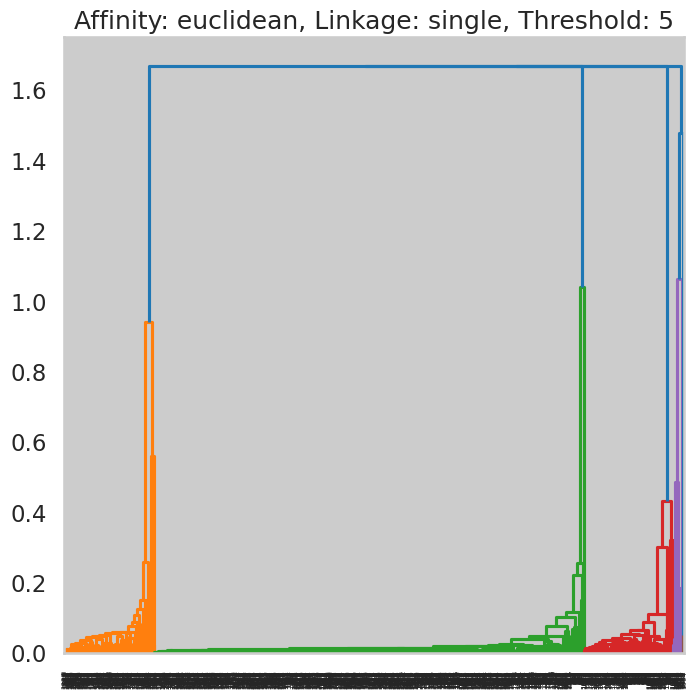

For affinity manhattan


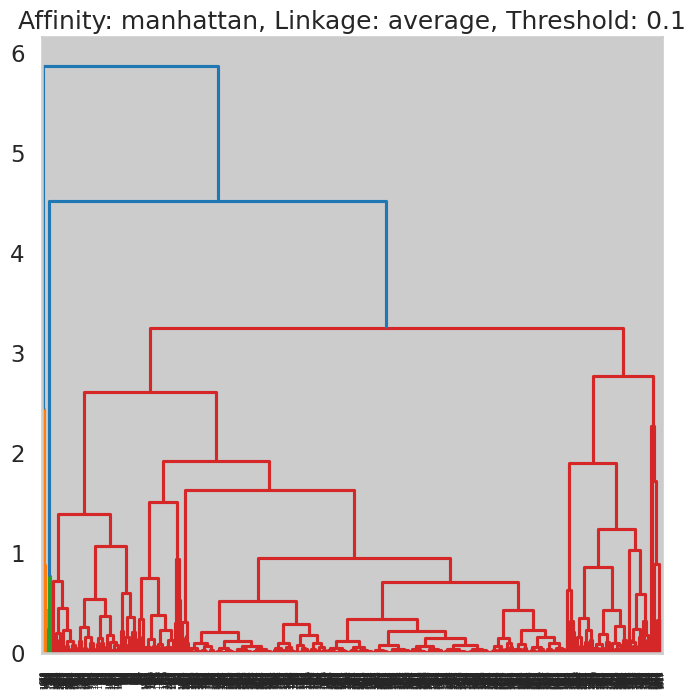

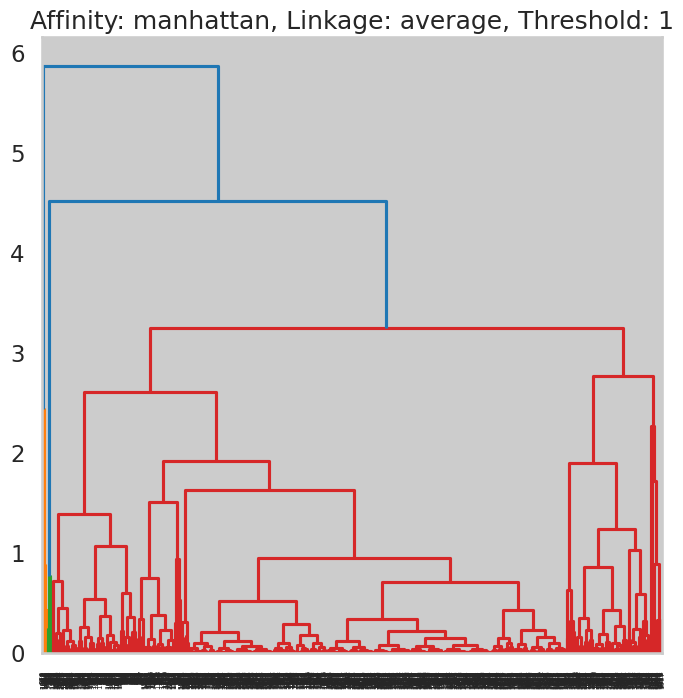

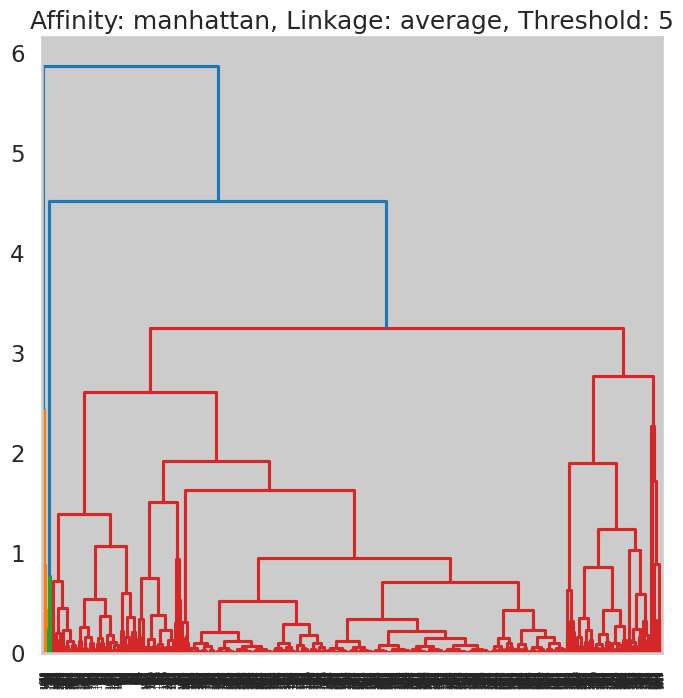

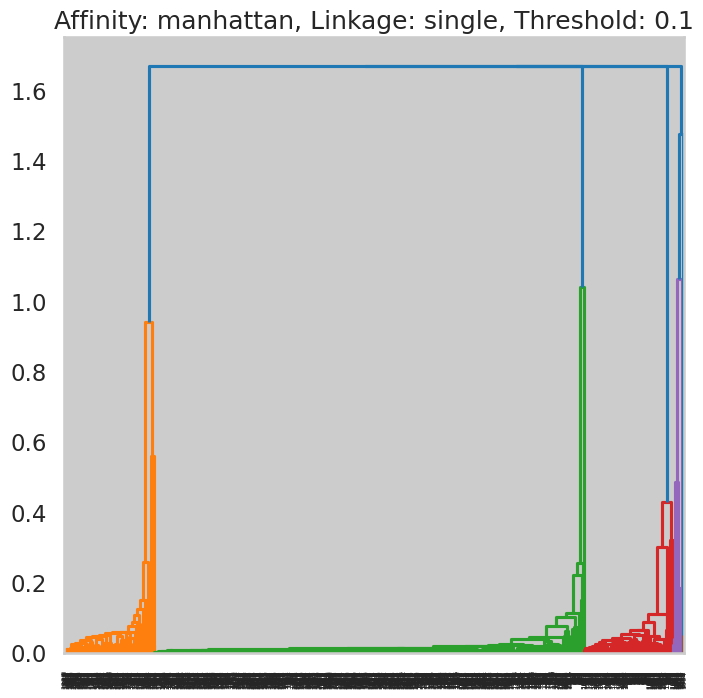

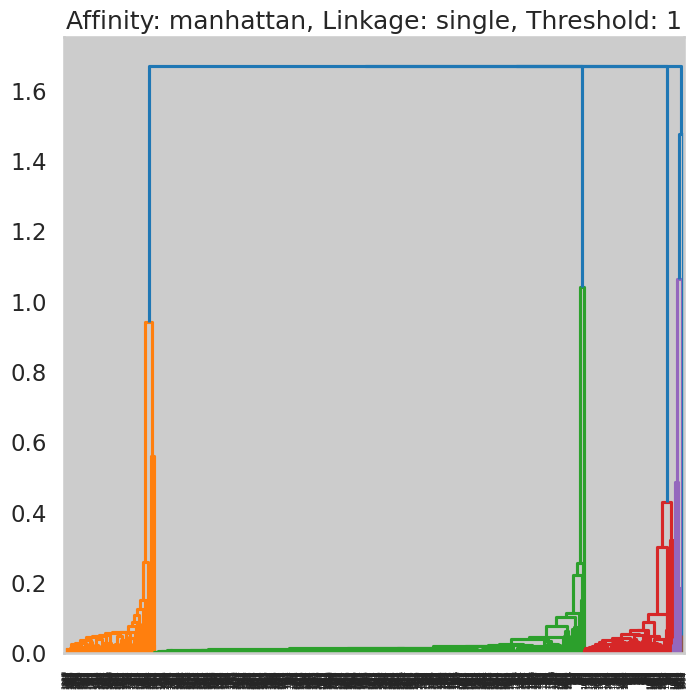

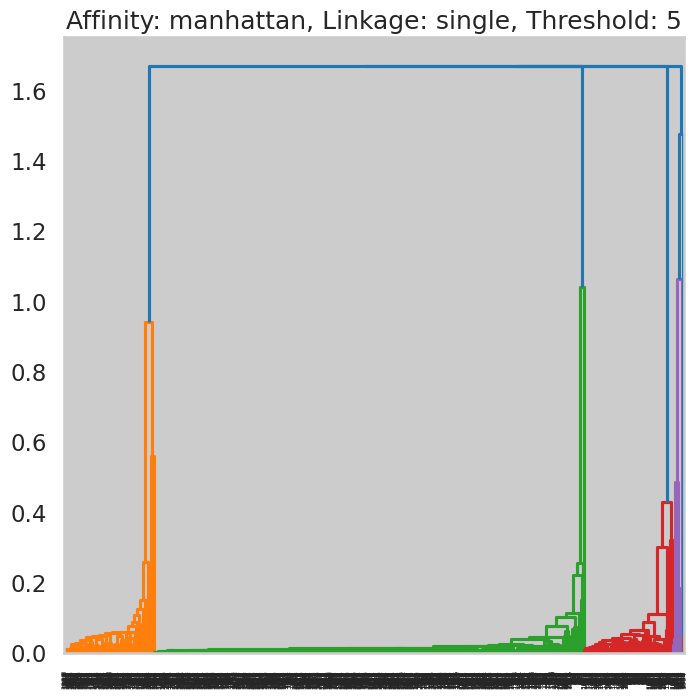

For affinity cosine


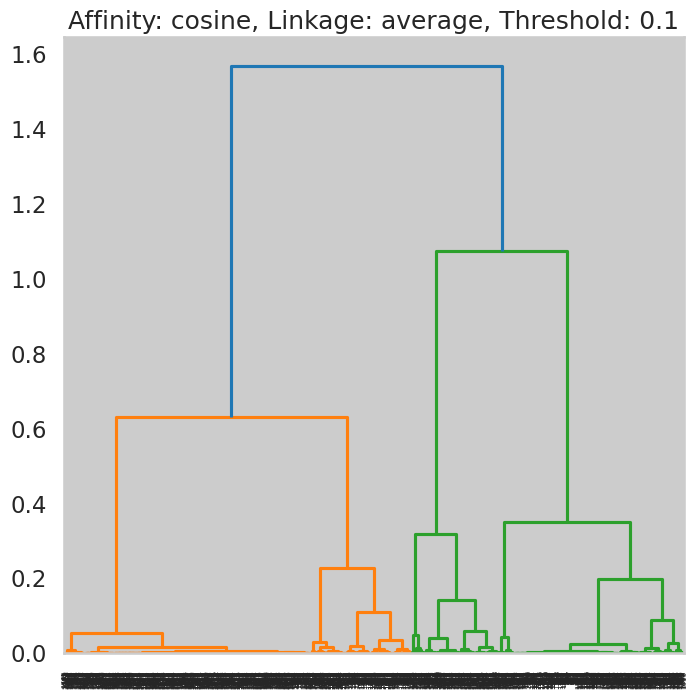

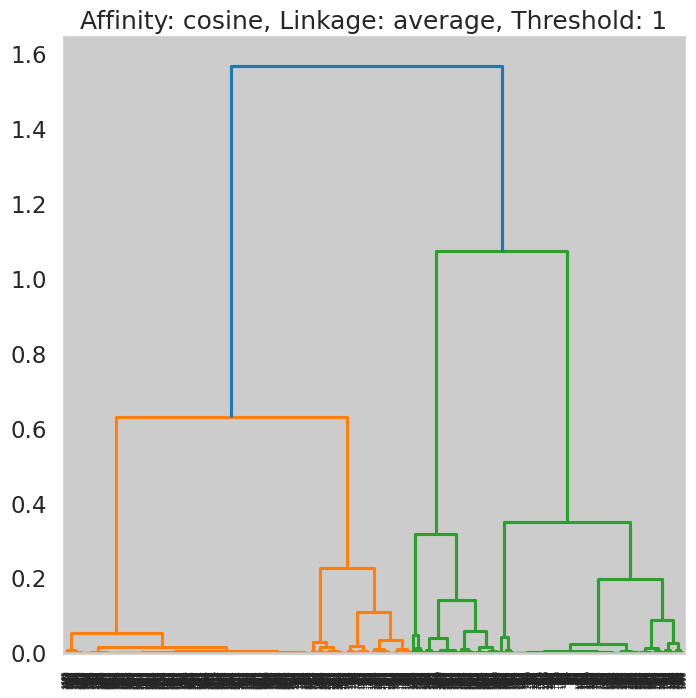

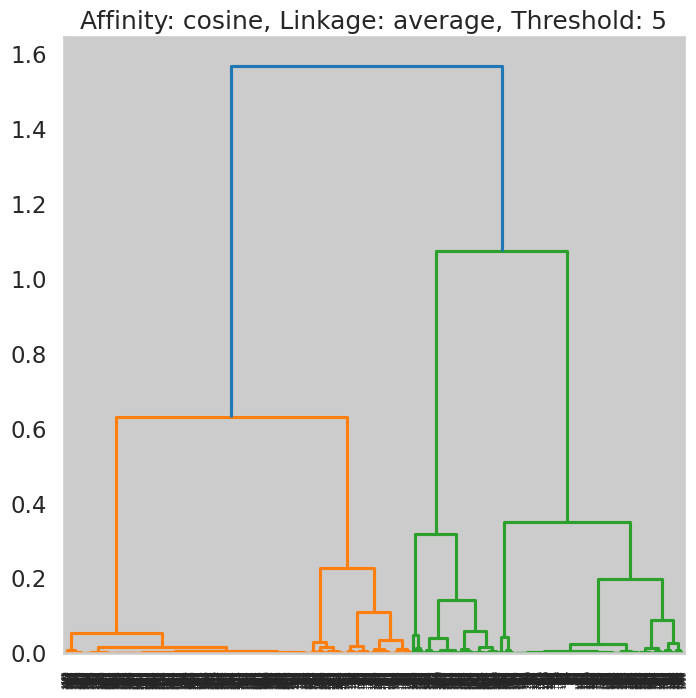

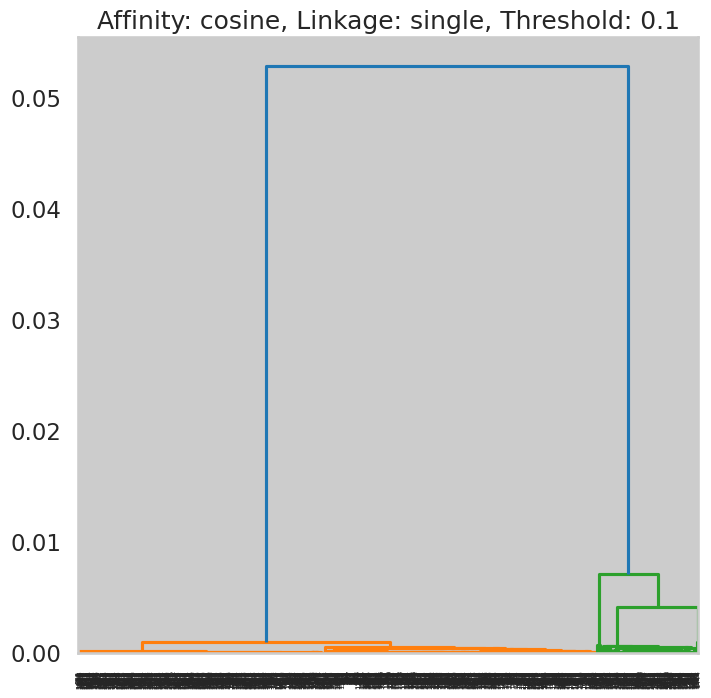

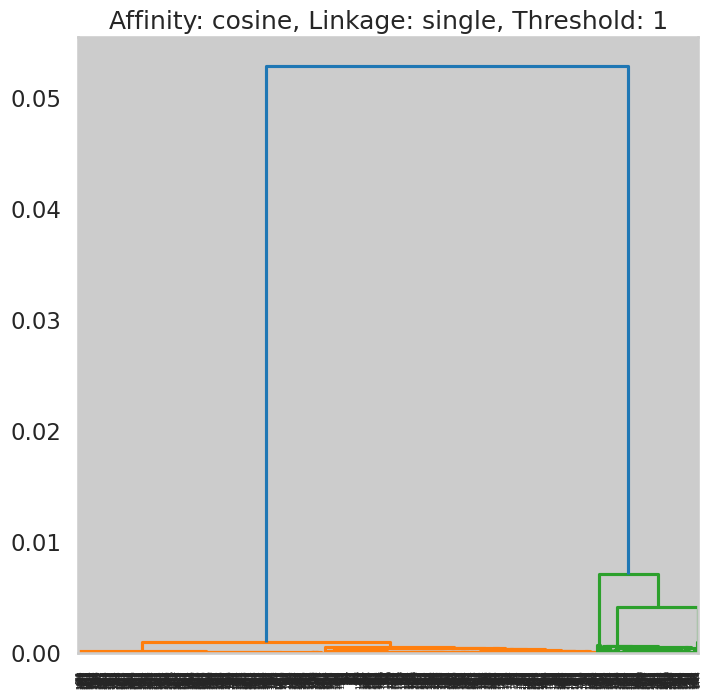

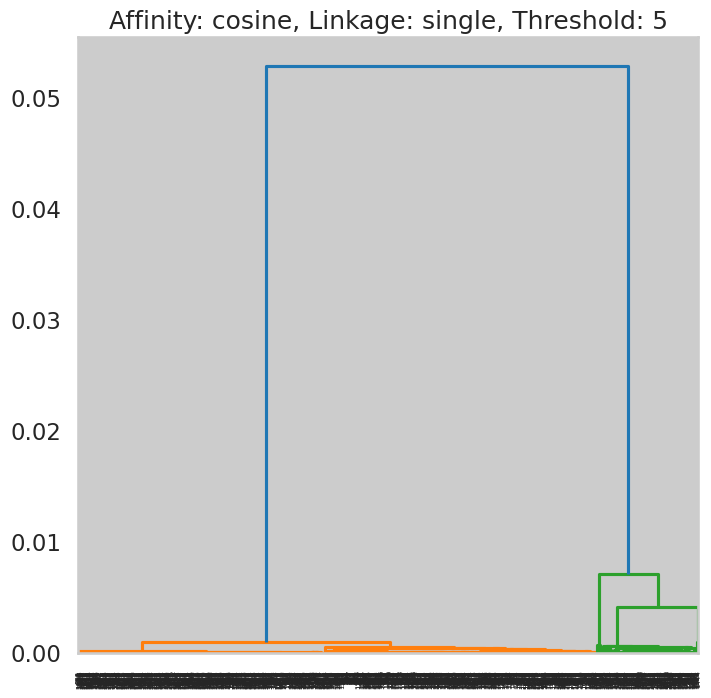

(np.float64(0.8128362066569272),
 <__main__.HierarchalClusteringParams at 0x7e6e65ceb9b0>)

In [65]:
get_best_params_from_agglomerative(customer_dataset)


# DBScan

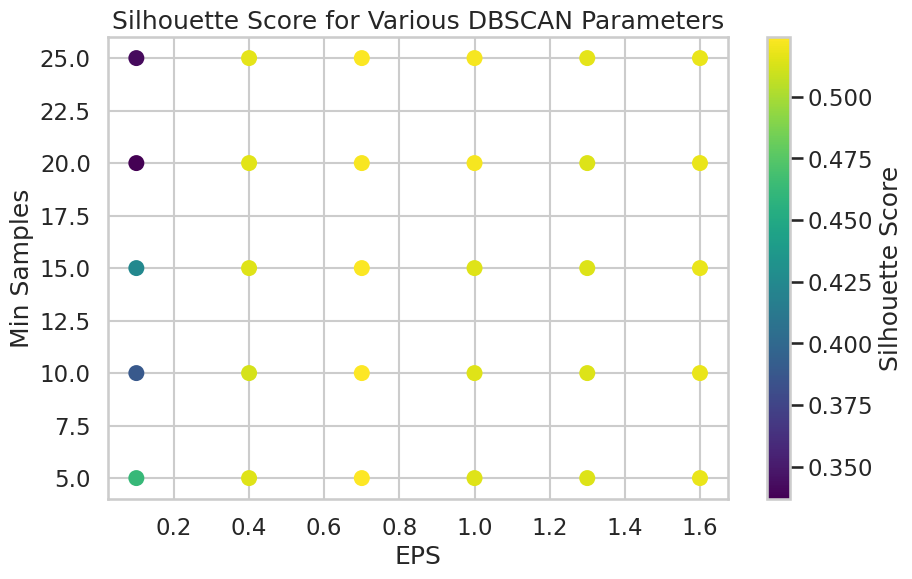

Best Silhouette Score: 0.5242277421728974
Best EPS: 0.7000000000000001
Best Min Samples: 5


(np.float64(0.5242277421728974), np.float64(0.7000000000000001), np.int64(5))

In [66]:
get_best_params_dbscan(customer_dataset)
